In [1]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
import numpy as np
%matplotlib inline
plt.style.use('Solarize_Light2')
import statistics
import talib as ta
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor as RF
import warnings
import math
from markovitz_utils import *
from pandas.core.common import SettingWithCopyWarning
import scipy.optimize as sco
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
pd.set_option('display.max_columns', 50)


In [327]:
# Input values

ave_trading_days = 252
ds = input("Where is the dataframe located?: ") or "Crypto data.csv"
Top_coins = int(input("Enter the top number of coins desired to look at e.g. 50: ") or "50")
Number_of_iterations = int(input("Enter number of modelling iterations e.g. 15: ") or "15")
back_date = input("What date do you want to run the model from e.g. : '2019-07-18' ") or '2019-07-18'
df2 = pd.read_csv(ds) # Importing dataset
d = int(input("What value is the asset return?: ") or "0")
top_50=df2[df2['Date']== back_date ].nlargest(Top_coins, 'Market Cap')["Symbol"].to_list() #get 50 crypto for market cap at the beginning of the timeseries
index__ = input("Where is the index df located?: ") or [['2020-03-25'], ['2020-04-24'],['2020-05-24'], ['2020-06-23'], ['2020-07-23'], ['2020-08-22'], ['2020-09-21'],
          ['2020-10-21'],['2020-11-20'],['2020-12-20'],['2021-01-19'],['2021-02-18'],['2021-03-20'],['2021-04-19'],['2021-05-19']] 
# For the above to work the df must be one singular column called "Index" with the date fields like above
if type(index__) == str:
    index__ = pd.read_csv(index__)
    index__ = index__["Index"].values.tolist()

Where is the dataframe located?:  
Enter the top number of coins desired to look at e.g. 50:  
Enter number of modelling iterations e.g. 15:  
What date do you want to run the model from e.g. : '2019-07-18'  
What value is the asset return?:  
Where is the index df located?:  


Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 3.55
Annualised Volatility: 0.31
Sharpe Ratio: 11 2


            BTC  ETH  XRP  LTC  BCH  BNB  USDT  EOS  BSV   XLM  TRX   ADA  \
allocation  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  1.09  0.0  0.31   

            XMR  DASH  LINK  NEO  MIOTA  ATOM  ETC  XTZ  XEM  MKR  ZEC  ONT  \
allocation  0.0   0.0  9.49  0.0    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   

              CRO  BTG   USDC  VSYS  DOGE  EGT  VET  BAT  QTUM  DCR  TUSD  \
allocation  17.42  0.0  14.39   0.0   0.0  0.0  0.0  0.0   0.0  0.0   0.0   

              OMG   HT   BTT  PAX  HEDG  RVN   HOT  LSK  BCD  WAVES  NANO  \
allocation  38.57  0.0  0.79  0.0   0.0  0.0  2.39  0.0  0.0    0.0   0.0   

            KMD    DGB   ZRX  
allocation  0.0  12.99  2.55  
--------------------------------------------------------------------------------
Minimum Volatilit

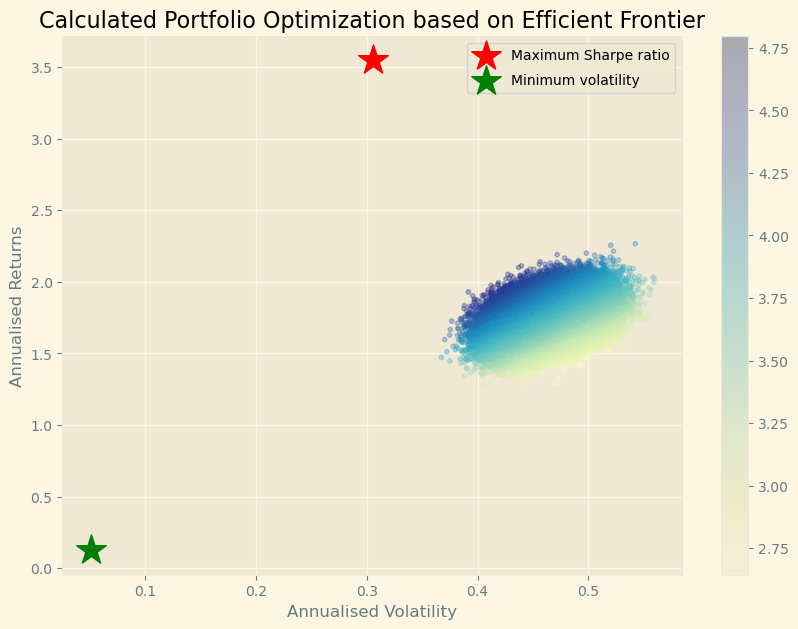

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 3.07
Annualised Volatility: 0.34
Sharpe Ratio: 9 2


            BTC  ETH  XRP  LTC  BCH  BNB  USDT  EOS  BSV  XLM  TRX   ADA  XMR  \
allocation  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  3.07  0.0   

            DASH  LINK  NEO  MIOTA  ATOM  ETC  XTZ  XEM  MKR  ZEC  ONT    CRO  \
allocation   0.0   0.0  0.0    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  45.18   

            BTG  USDC  VSYS  DOGE  EGT   VET  BAT  QTUM  DCR  TUSD    OMG  \
allocation  0.0   0.0   0.0   0.0  0.0  3.08  0.0   0.0  0.0   0.0  11.11   

             HT  BTT  PAX  HEDG  RVN   HOT  LSK  BCD  WAVES  NANO   KMD   DGB  \
allocation  0.0  0.0  0.0   0.0  0.0  2.43  0.0  0.0    0.0  21.0  0.45  4.17   

            ZRX  
allocation  9.5  
--------------------------------------------------------------------------------
Minimum Volatility Portf

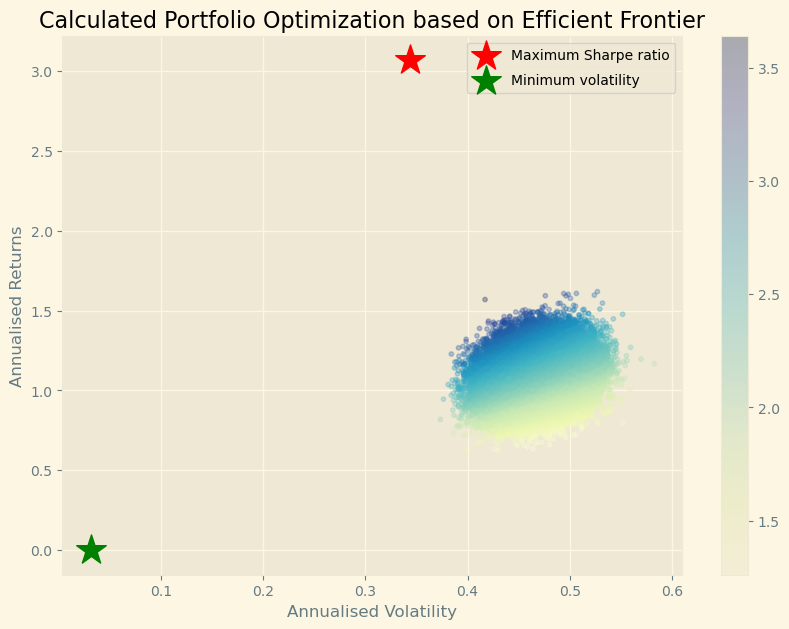

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 2.04
Annualised Volatility: 0.25
Sharpe Ratio: 8 2


            BTC  ETH  XRP  LTC  BCH  BNB  USDT  EOS  BSV   XLM  TRX  ADA  XMR  \
allocation  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  2.94  0.0  0.0  0.0   

            DASH  LINK  NEO  MIOTA  ATOM  ETC  XTZ  XEM  MKR   ZEC   ONT  CRO  \
allocation   0.0   0.0  0.0   1.23   0.0  0.0  0.0  0.0  4.7  3.08  2.37  0.0   

            BTG  USDC  VSYS  DOGE   EGT    VET  BAT   QTUM  DCR  TUSD   OMG  \
allocation  0.0   0.0   0.0   0.0  6.24  18.58  0.0  31.56  0.0   0.0  0.01   

             HT  BTT    PAX  HEDG  RVN  HOT  LSK  BCD  WAVES  NANO  KMD  DGB  \
allocation  0.0  0.0  11.43   0.0  0.0  0.0  0.0  9.0    0.0   0.0  0.0  0.0   

             ZRX  
allocation  8.86  
--------------------------------------------------------------------------------
Minimum Volatility P

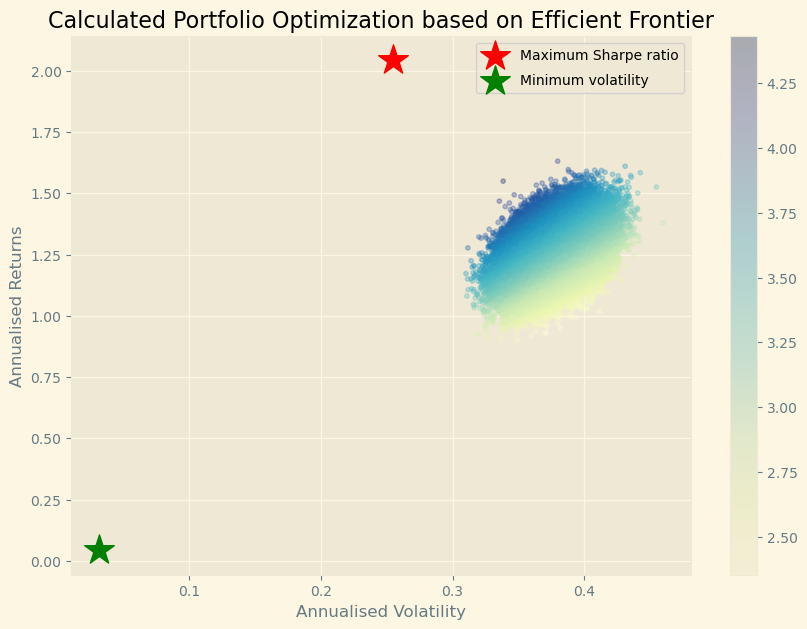

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 1.06
Annualised Volatility: 0.12
Sharpe Ratio: 8 2


            BTC  ETH   XRP  LTC  BCH  BNB  USDT  EOS  BSV  XLM   TRX  ADA  \
allocation  0.0  0.0  4.84  0.0  0.0  0.0   0.0  0.0  0.0  0.0  6.35  0.0   

            XMR  DASH  LINK  NEO  MIOTA   ATOM  ETC  XTZ   XEM  MKR  ZEC  ONT  \
allocation  0.0   0.0   0.0  0.0    0.0  15.23  0.0  0.0  1.68  0.0  0.0  0.0   

            CRO  BTG  USDC  VSYS  DOGE  EGT  VET  BAT  QTUM  DCR  TUSD  OMG  \
allocation  0.0  0.0   0.0   0.0   0.0  1.9  0.0  0.0   0.0  0.0   0.0  0.0   

             HT  BTT    PAX  HEDG  RVN  HOT  LSK  BCD  WAVES  NANO  KMD   DGB  \
allocation  0.0  0.0  57.17   9.9  0.0  0.0  0.0  0.0    2.2   0.0  0.0  0.22   

             ZRX  
allocation  0.52  
--------------------------------------------------------------------------------
Minimum Volatility Portfol

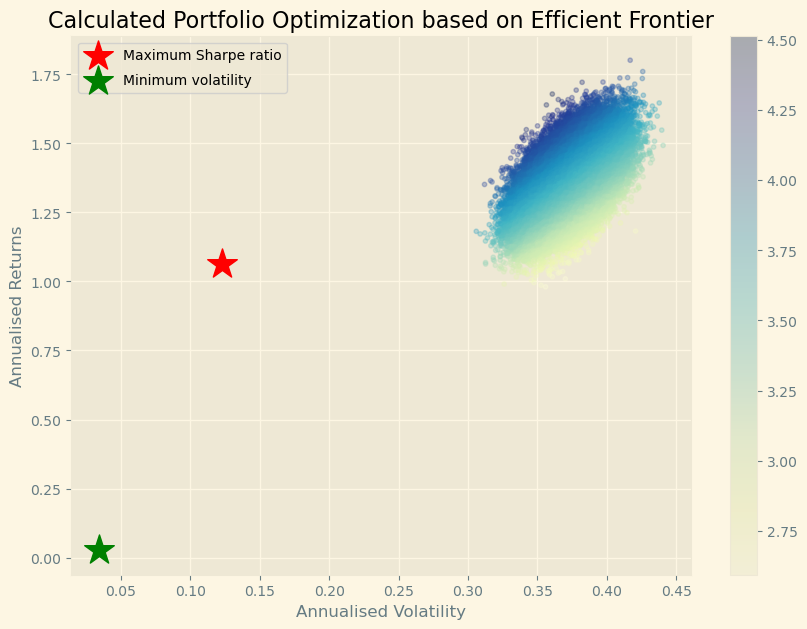

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.6
Annualised Volatility: 0.08
Sharpe Ratio: 7 2


            BTC   ETH  XRP  LTC  BCH   BNB  USDT  EOS  BSV  XLM  TRX  ADA  \
allocation  0.0  1.97  0.0  0.0  0.0  0.81   0.0  0.0  0.0  0.0  0.0  0.0   

             XMR  DASH  LINK   NEO  MIOTA  ATOM  ETC  XTZ   XEM  MKR  ZEC  \
allocation  0.37   0.0   0.0  5.63    0.0   0.0  0.0  0.0  2.55  0.0  0.0   

            ONT  CRO  BTG   USDC  VSYS  DOGE  EGT  VET  BAT  QTUM  DCR  TUSD  \
allocation  0.0  0.0  0.0  13.04   0.0   0.0  0.0  0.0  0.0   0.0  0.0   0.0   

             OMG   HT  BTT    PAX  HEDG  RVN  HOT  LSK  BCD  WAVES  NANO  KMD  \
allocation  1.96  0.0  0.0  71.57   0.0  0.0  0.0  0.0  0.0   2.08   0.0  0.0   

            DGB  ZRX  
allocation  0.0  0.0  
--------------------------------------------------------------------------------
Minimum Volatility Portfo

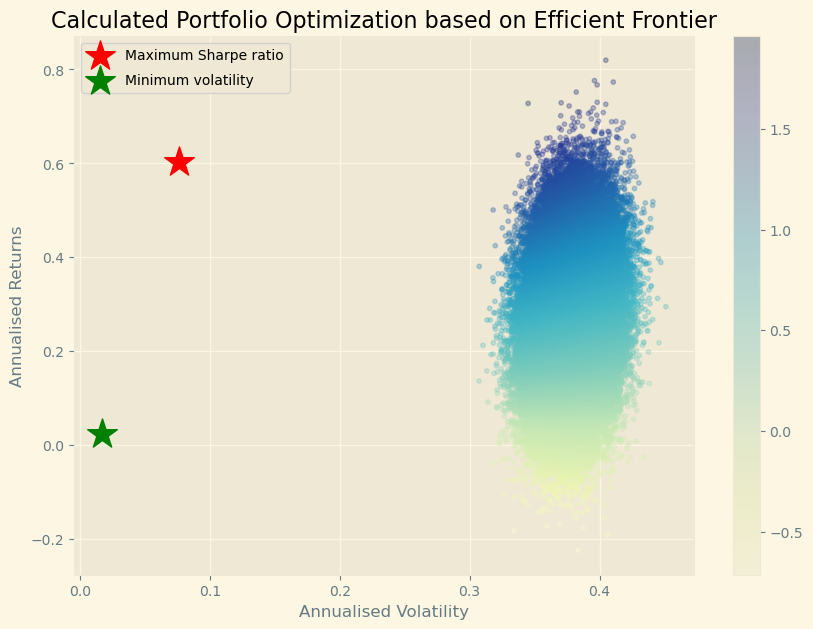

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.32
Annualised Volatility: 0.12
Sharpe Ratio: 2 2


            BTC  ETH  XRP  LTC  BCH   BNB  USDT  EOS  BSV  XLM  TRX  ADA  \
allocation  0.0  0.0  0.0  0.0  0.0  9.48   0.0  0.0  0.0  0.0  0.0  0.0   

             XMR  DASH  LINK  NEO  MIOTA  ATOM  ETC  XTZ    XEM  MKR  ZEC  \
allocation  5.89   0.0   0.0  0.0    0.0   0.0  0.0  0.0  11.38  0.0  0.0   

            ONT  CRO  BTG   USDC  VSYS  DOGE  EGT  VET  BAT  QTUM  DCR  TUSD  \
allocation  0.0  0.0  0.0  73.26   0.0   0.0  0.0  0.0  0.0   0.0  0.0   0.0   

            OMG   HT  BTT  PAX  HEDG  RVN  HOT  LSK  BCD  WAVES  NANO  KMD  \
allocation  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0    0.0   0.0  0.0   

            DGB  ZRX  
allocation  0.0  0.0  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio All

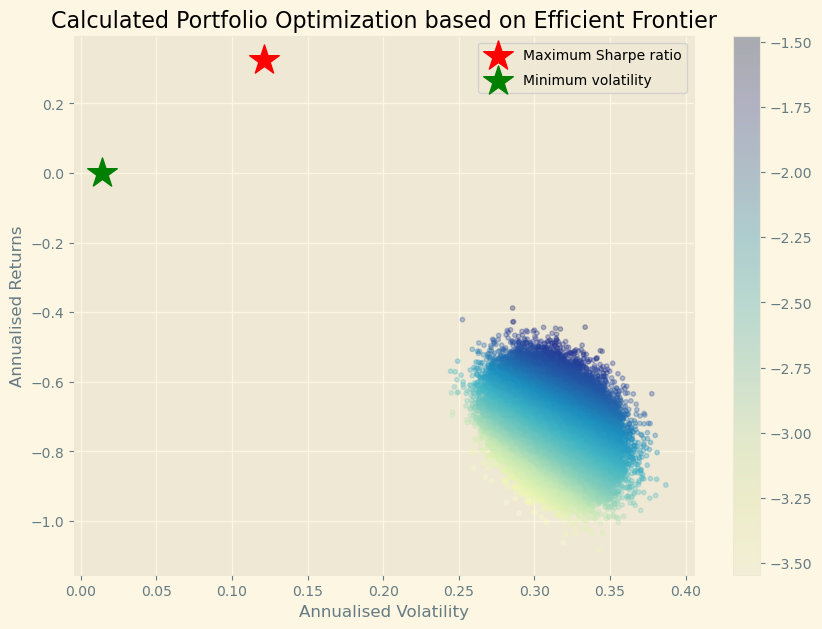

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.33
Annualised Volatility: 0.05
Sharpe Ratio: 6 2


             BTC  ETH   XRP  LTC  BCH  BNB  USDT  EOS   BSV  XLM  TRX  ADA  \
allocation  5.04  0.0  1.13  0.9  0.0  0.0  6.86  0.0  0.56  0.0  0.0  0.0   

            XMR  DASH  LINK  NEO  MIOTA  ATOM  ETC  XTZ  XEM  MKR  ZEC  ONT  \
allocation  0.0   0.0  1.22  0.0    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   

            CRO  BTG   USDC  VSYS  DOGE   EGT  VET  BAT  QTUM   DCR  TUSD  \
allocation  0.0  0.0  77.16   0.4   0.0  0.75  0.0  0.0   0.0  0.84   0.0   

            OMG   HT  BTT  PAX  HEDG  RVN  HOT  LSK  BCD  WAVES  NANO  KMD  \
allocation  0.0  0.0  0.0  0.0  0.87  0.0  0.0  0.0  0.0   4.26   0.0  0.0   

            DGB  ZRX  
allocation  0.0  0.0  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio A

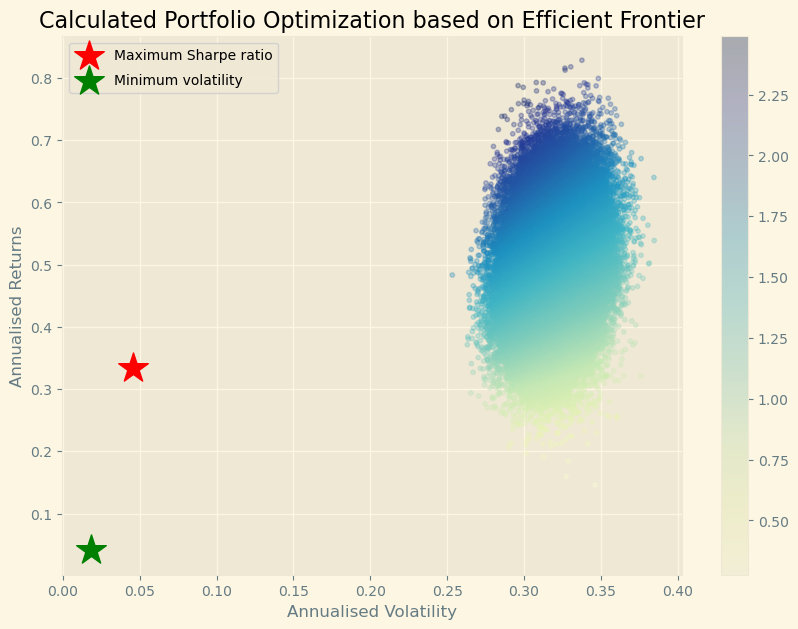

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 1.2
Annualised Volatility: 0.12
Sharpe Ratio: 10 2


            BTC   ETH   XRP   LTC  BCH  BNB  USDT  EOS  BSV   XLM  TRX  ADA  \
allocation  0.0  0.33  1.91  2.74  0.0  0.0  1.11  0.0  0.0  0.29  0.0  0.0   

            XMR  DASH  LINK  NEO  MIOTA  ATOM  ETC  XTZ   XEM  MKR  ZEC  ONT  \
allocation  0.0   0.0   0.0  0.0    0.0   0.0  0.0  0.0  4.89  0.0  0.0  0.0   

            CRO  BTG   USDC  VSYS  DOGE  EGT  VET  BAT  QTUM    DCR   TUSD  \
allocation  0.0  0.0  13.99  1.08   0.0  0.0  0.0  0.0   0.0  16.78  55.78   

            OMG   HT  BTT  PAX  HEDG  RVN  HOT  LSK  BCD  WAVES  NANO  KMD  \
allocation  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0    1.1   0.0  0.0   

            DGB  ZRX  
allocation  0.0  0.0  
--------------------------------------------------------------------------------
Minimum Volatility Portf

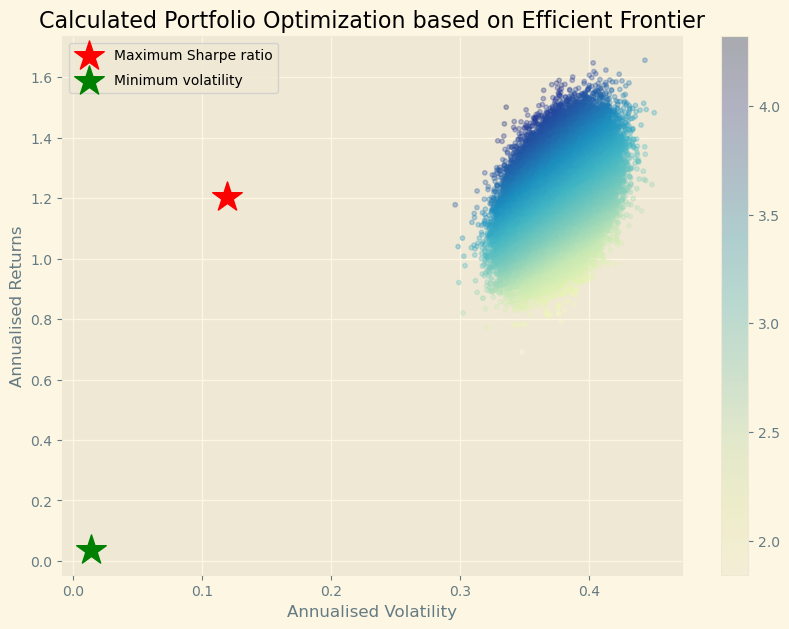

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 2.0
Annualised Volatility: 0.16
Sharpe Ratio: 12 2


            BTC   ETH   XRP  LTC  BCH  BNB   USDT  EOS  BSV   XLM  TRX  ADA  \
allocation  0.0  6.21  1.44  0.0  0.0  0.0  16.85  0.0  0.0  2.07  0.0  0.0   

            XMR  DASH  LINK  NEO  MIOTA  ATOM  ETC  XTZ  XEM  MKR  ZEC  ONT  \
allocation  0.0   0.0   0.0  0.0    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   

             CRO  BTG  USDC  VSYS  DOGE  EGT  VET  BAT  QTUM    DCR  TUSD  \
allocation  6.45  0.0   0.0   2.0  2.22  0.0  0.0  0.0   0.0  26.08   0.0   

            OMG   HT  BTT    PAX  HEDG  RVN   HOT  LSK  BCD  WAVES  NANO  \
allocation  0.0  0.0  0.0  29.81  2.75  0.0  1.87  0.0  0.0   0.09   0.0   

             KMD  DGB  ZRX  
allocation  2.17  0.0  0.0  
--------------------------------------------------------------------------------
Minimum Volatility P

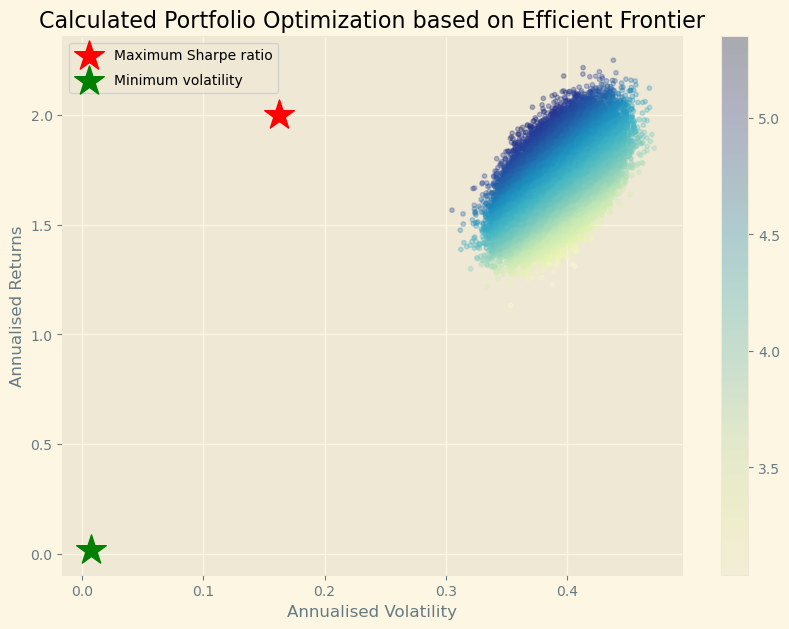

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 4.03
Annualised Volatility: 0.32
Sharpe Ratio: 13 2


            BTC  ETH  XRP  LTC  BCH  BNB  USDT  EOS  BSV   XLM  TRX  ADA  XMR  \
allocation  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  7.21  0.0  0.0  0.0   

            DASH  LINK  NEO  MIOTA  ATOM  ETC  XTZ  XEM  MKR  ZEC  ONT  CRO  \
allocation   0.0   0.0  0.0    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

            BTG  USDC  VSYS  DOGE   EGT  VET  BAT  QTUM    DCR  TUSD  OMG  \
allocation  0.0   0.0   0.0  8.59  7.28  0.0  0.0   0.0  20.61   0.0  0.0   

             HT  BTT   PAX   HEDG   RVN   HOT  LSK  BCD  WAVES  NANO  KMD  \
allocation  0.0  0.0  21.5  10.86  6.46  0.95  0.0  0.0    0.0  1.58  0.0   

            DGB    ZRX  
allocation  0.0  14.95  
--------------------------------------------------------------------------------
Minimum Volatility Po

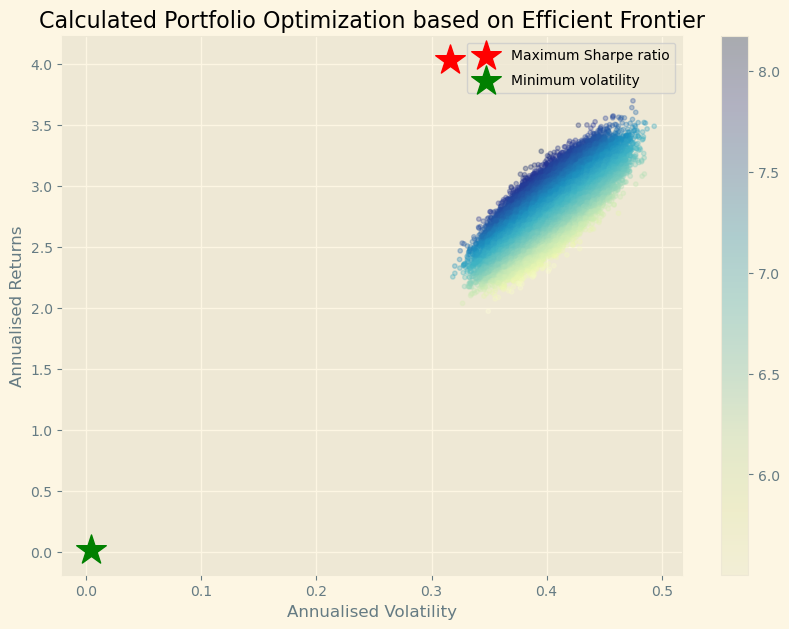

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 1.77
Annualised Volatility: 0.19
Sharpe Ratio: 9 2


              BTC  ETH  XRP  LTC  BCH  BNB   USDT  EOS  BSV  XLM  TRX  ADA  \
allocation  11.68  0.0  0.0  0.0  0.0  0.0  28.64  0.0  0.0  0.0  0.0  0.0   

            XMR  DASH  LINK  NEO  MIOTA  ATOM  ETC  XTZ  XEM  MKR  ZEC  ONT  \
allocation  0.0   0.0   0.0  0.0    0.0   0.0  0.0  0.0  1.5  0.0  0.0  0.0   

             CRO  BTG  USDC  VSYS  DOGE   EGT  VET   BAT  QTUM   DCR  TUSD  \
allocation  7.74  0.0   0.0  4.48   0.0  0.76  0.0  5.02   1.0  3.78   0.0   

            OMG   HT  BTT   PAX  HEDG   RVN   HOT  LSK  BCD  WAVES  NANO  \
allocation  0.0  0.0  0.0  13.2   0.0  4.82  3.29  0.0  0.0    0.0  0.25   

             KMD  DGB   ZRX  
allocation  7.21  0.0  6.63  
--------------------------------------------------------------------------------
Minimum Volatility

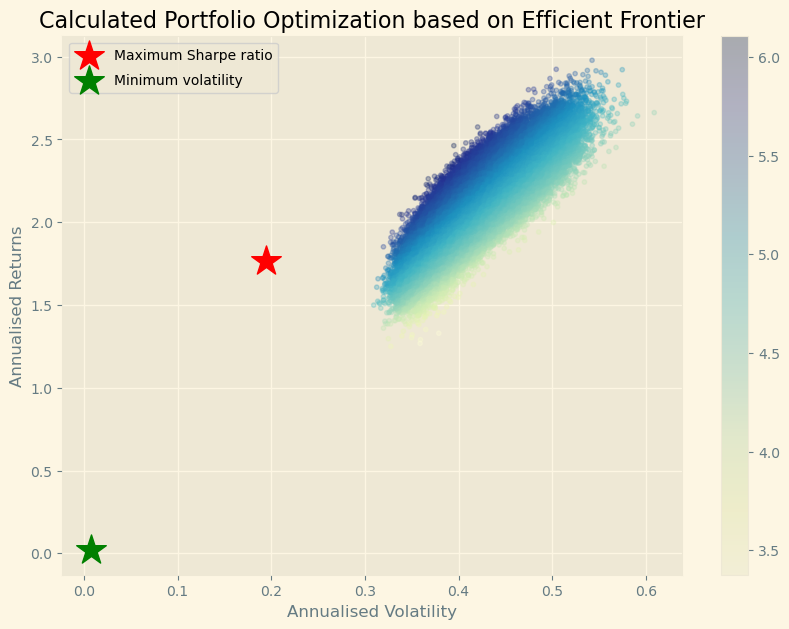

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 1.84
Annualised Volatility: 0.24
Sharpe Ratio: 8 2


            BTC  ETH   XRP  LTC  BCH   BNB  USDT  EOS  BSV  XLM  TRX  ADA  \
allocation  0.0  0.0  8.29  0.0  0.0  3.85   0.0  0.0  0.0  0.0  0.0  0.0   

            XMR  DASH  LINK   NEO  MIOTA  ATOM  ETC  XTZ  XEM  MKR   ZEC  ONT  \
allocation  0.0   0.0   0.0  0.87   1.49   0.0  0.0  0.0  0.0  0.0  2.02  0.0   

              CRO  BTG  USDC  VSYS  DOGE  EGT  VET  BAT  QTUM  DCR  TUSD  OMG  \
allocation  28.88  0.0   0.0  6.01  10.5  0.0  0.0  0.0  3.03  0.0   0.0  0.0   

             HT  BTT    PAX  HEDG  RVN  HOT  LSK  BCD  WAVES  NANO   KMD  DGB  \
allocation  0.0  0.0  27.19   0.0  0.0  0.0  0.0  0.0    0.0   0.0  7.87  0.0   

            ZRX  
allocation  0.0  
--------------------------------------------------------------------------------
Minimum Volatility Portf

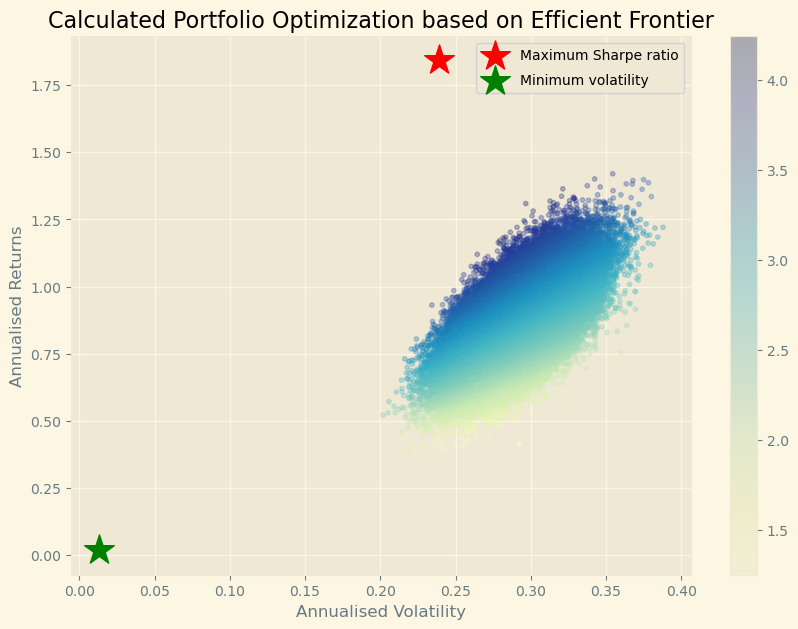

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 2.16
Annualised Volatility: 0.3
Sharpe Ratio: 7 2


            BTC  ETH    XRP  LTC  BCH  BNB   USDT  EOS  BSV  XLM  TRX   ADA  \
allocation  0.0  0.0  11.73  0.0  0.0  0.0  19.05  0.0  0.0  0.0  0.0  6.68   

            XMR  DASH  LINK  NEO  MIOTA  ATOM    ETC  XTZ  XEM  MKR   ZEC  \
allocation  0.0   0.0   0.0  0.0    0.0   0.0  13.18  0.0  0.0  0.0  4.99   

            ONT  CRO  BTG  USDC  VSYS  DOGE  EGT  VET  BAT  QTUM  DCR  TUSD  \
allocation  0.0  0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  7.28  0.0  5.55   

            OMG     HT   BTT  PAX  HEDG  RVN  HOT    LSK  BCD  WAVES  NANO  \
allocation  0.0  10.65  2.14  0.0  4.27  0.0  0.0  14.48  0.0    0.0   0.0   

            KMD  DGB  ZRX  
allocation  0.0  0.0  0.0  
--------------------------------------------------------------------------------
Minimum Volatility 

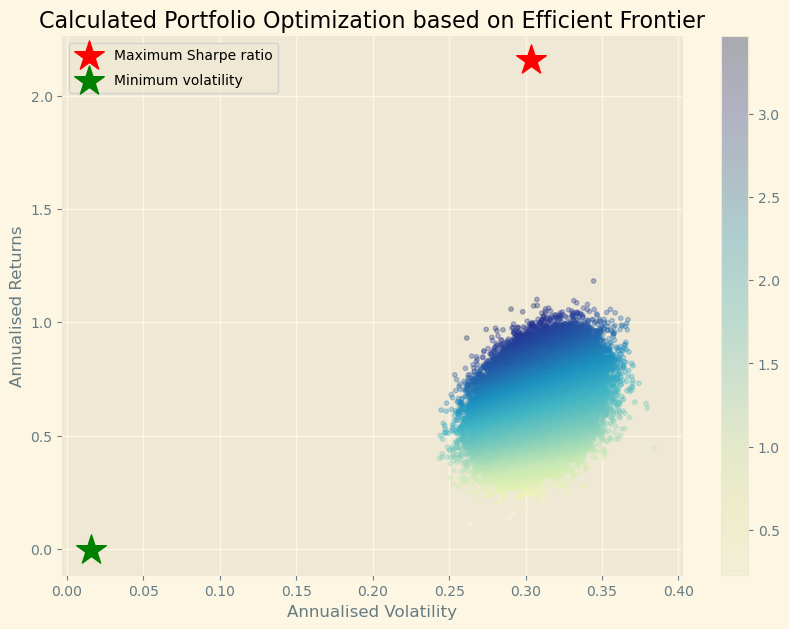

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.37
Annualised Volatility: 0.33
Sharpe Ratio: 1 2


            BTC  ETH  XRP  LTC  BCH  BNB  USDT  EOS  BSV  XLM  TRX  ADA  XMR  \
allocation  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   

            DASH  LINK  NEO  MIOTA  ATOM  ETC  XTZ  XEM  MKR  ZEC  ONT  CRO  \
allocation   0.0   0.0  0.0    0.0  4.85  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

            BTG  USDC  VSYS  DOGE  EGT  VET  BAT  QTUM  DCR  TUSD  OMG     HT  \
allocation  0.0   0.0   0.0   0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  57.95   

            BTT  PAX   HEDG  RVN  HOT  LSK    BCD  WAVES  NANO  KMD  DGB  ZRX  
allocation  0.0  0.0  15.82  0.0  0.0  0.0  21.39    0.0   0.0  0.0  0.0  0.0  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: -

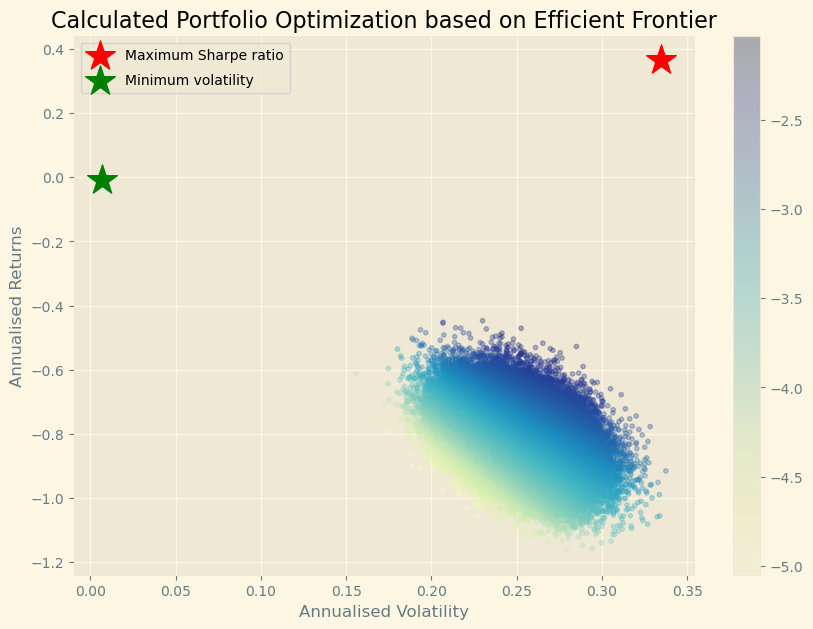

Only has one value
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 1.19
Annualised Volatility: 0.94
Sharpe Ratio: 1 2


            BTC  ETH  XRP  LTC  BCH  BNB  USDT  EOS  BSV  XLM  TRX  ADA  XMR  \
allocation  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   

            DASH  LINK  NEO  MIOTA  ATOM  ETC  XTZ  XEM  MKR  ZEC  ONT  CRO  \
allocation   0.0   0.0  0.0    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

            BTG  USDC  VSYS  DOGE  EGT  VET  BAT  QTUM   DCR  TUSD  OMG   HT  \
allocation  0.0   0.0   0.0   0.0  0.0  0.0  0.0   0.0  0.72   0.0  0.0  0.0   

            BTT  PAX  HEDG    RVN  HOT  LSK    BCD  WAVES  NANO  KMD  DGB  ZRX  
allocation  0.0  0.0   0.0  76.42  0.0  0.0  22.86    0.0   0.0  0.0  0.0  0.0  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: -

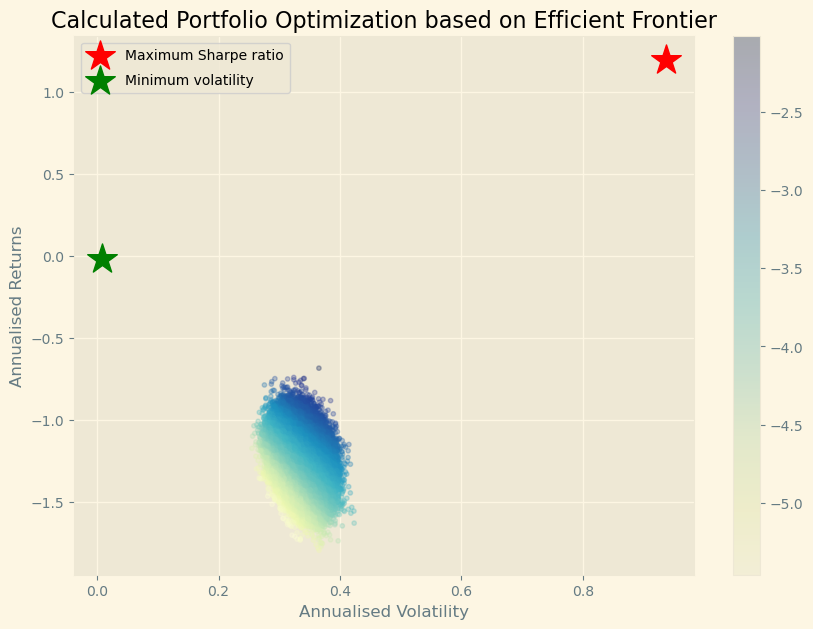

In [209]:


sharpe_allocation = []
risk_15 = []
return_15 = []

for index in index__:
    mod_df=pd.DataFrame()
    for i in range(len(top_50)):
        try:
            temp_df=pd.read_csv(f'predicted_prices/{top_50[i]}_{index}.csv').set_index('Date')
            temp_df.rename(columns={"Predicted_Close": f"{top_50[i]}"},inplace=True)
            mod_df=pd.concat([mod_df, temp_df], axis=1)
        except:
            print("Only has one value")

    returns = mod_df.pct_change()
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    num_portfolios = 100000
    risk_free_rate = 0.05
    annual_returns = (1 + mean_returns)**(ave_trading_days/60) - 1

    results, sdp_max, rp_max, max_sharpe_allocation, sdp_min, rp_min, min_vol_allocation = calculated_ef_with_random(mod_df,mean_returns, cov_matrix, num_portfolios, risk_free_rate, ave_trading_days)
    risk_15.append(sdp_max)
    return_15.append(rp_max)
    
    
    show_graph(results, sdp_max, rp_max, max_sharpe_allocation, sdp_min, rp_min, min_vol_allocation, risk_free_rate)
    plt.pause(0.000005)
    sharpe_allocation.append(max_sharpe_allocation)
    
    
    
plt.show()




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


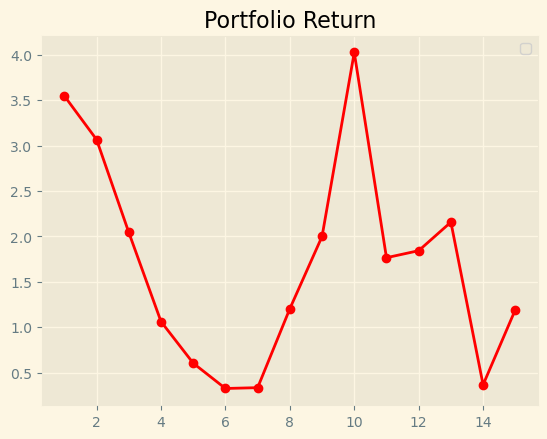

In [4]:
plt.tight_layout()  
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], return_15, color='red', marker='o')     
plt.title("Portfolio Return")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


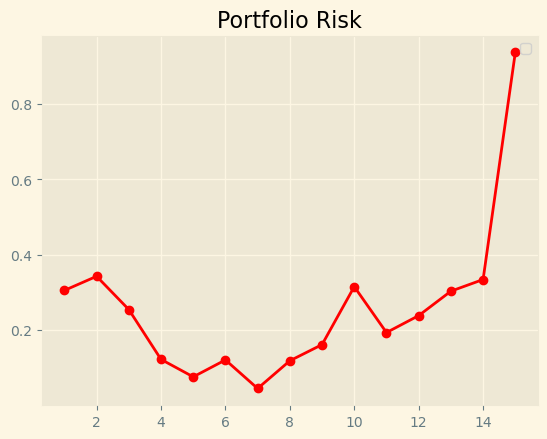

In [5]:
plt.tight_layout()  
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], risk_15, color='red', marker='o')     
plt.title("Portfolio Risk")
plt.legend()
plt.show()

Only has one value


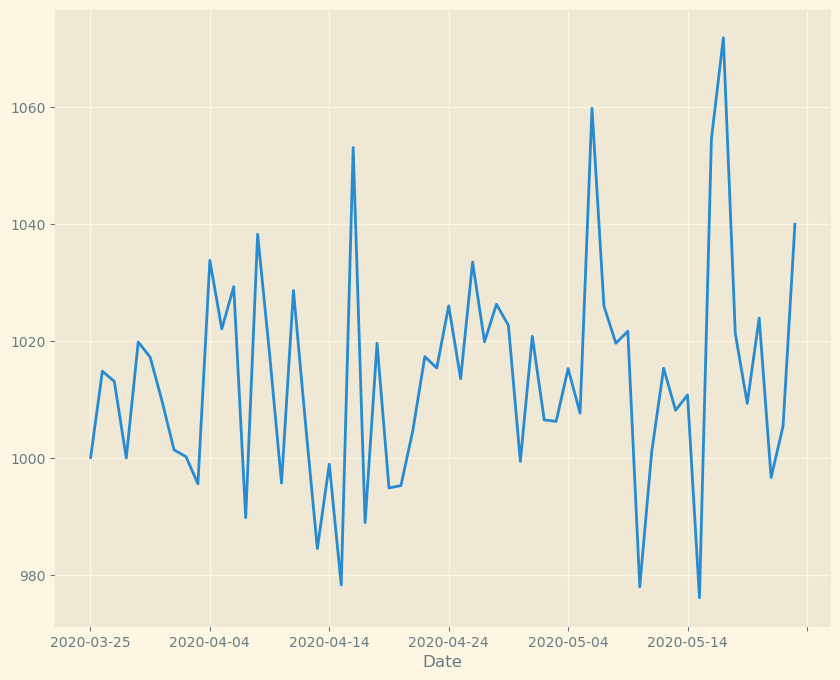

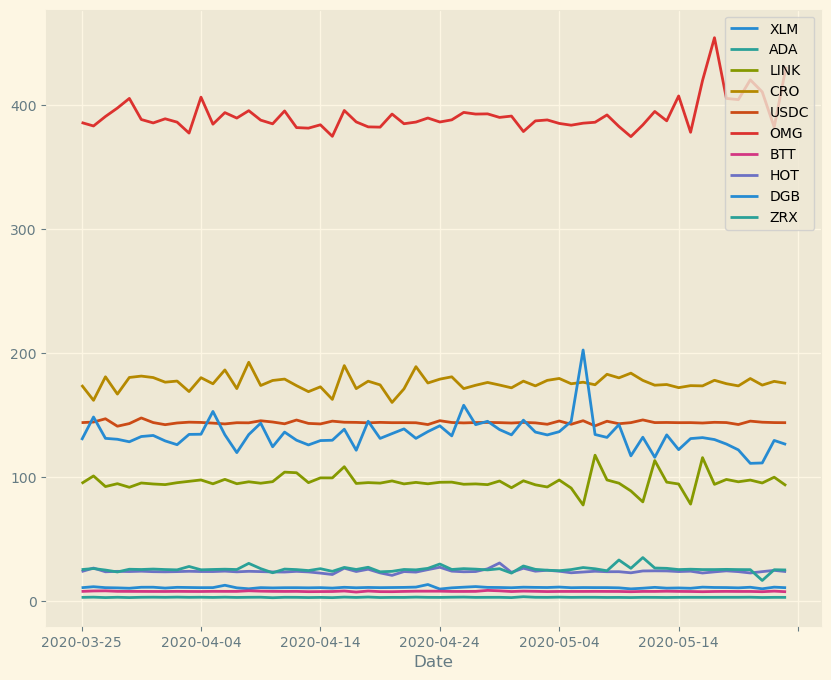

These are the predicted portfolio returns The first set is the annual returns before standardising

 XLM     -0.003717
ADA      0.009483
LINK    -0.075597
CRO      0.033221
USDC    -0.001148
OMG      0.588937
BTT     -0.128293
HOT     -0.005122
DGB     -0.110543
ZRX     -0.050982
Total    0.180733
dtype: float64 

 The latter is the standardised annual returns

 XLM      0.010747
ADA      0.009619
LINK     0.026434
CRO      0.006207
USDC     0.000344
OMG      0.010968
BTT      0.000312
HOT      0.011788
DGB      0.022705
ZRX      0.034747
Total    0.004313
dtype: float64
Only has one value


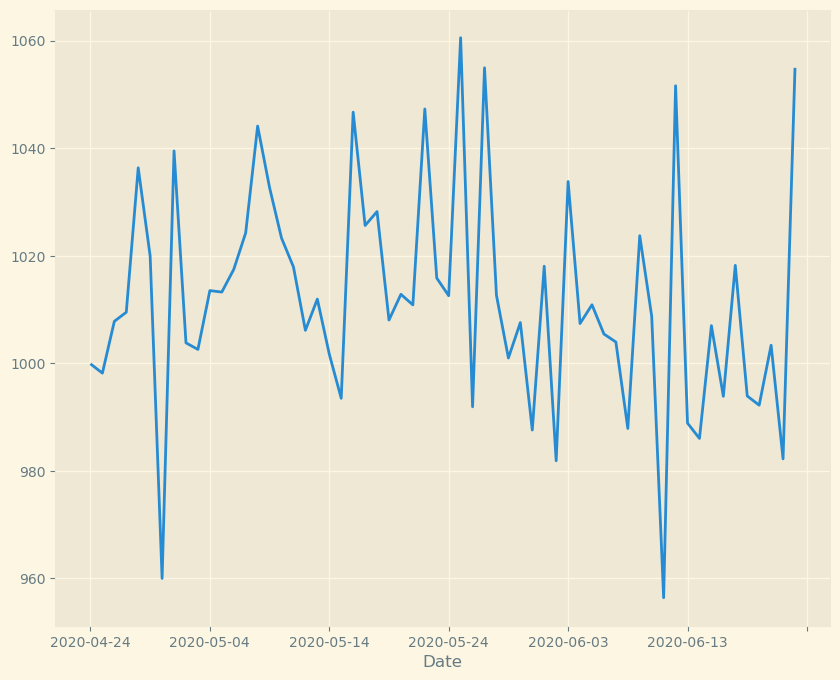

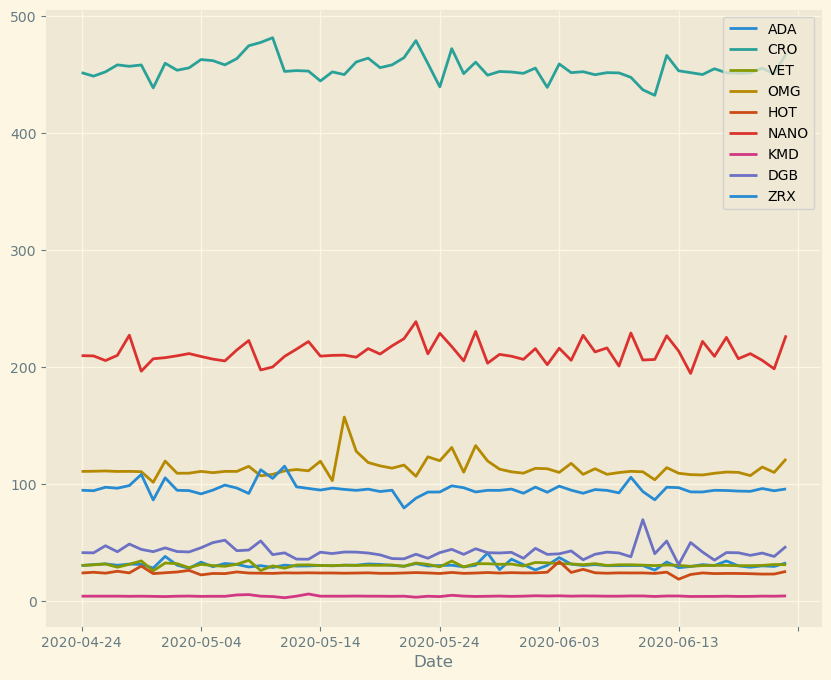

These are the predicted portfolio returns The first set is the annual returns before standardising

 ADA      0.334684
CRO      0.158754
VET      0.086383
OMG      0.468621
HOT      0.261349
NANO     0.395245
KMD      0.235670
DGB      0.663660
ZRX      0.051126
Total    0.252330
dtype: float64 

 The latter is the standardised annual returns

 ADA      0.036091
CRO      0.003835
VET      0.015368
OMG      0.024571
HOT      0.021971
NANO     0.014906
KMD      0.033595
DGB      0.076521
ZRX      0.012171
Total    0.006058
dtype: float64
Only has one value


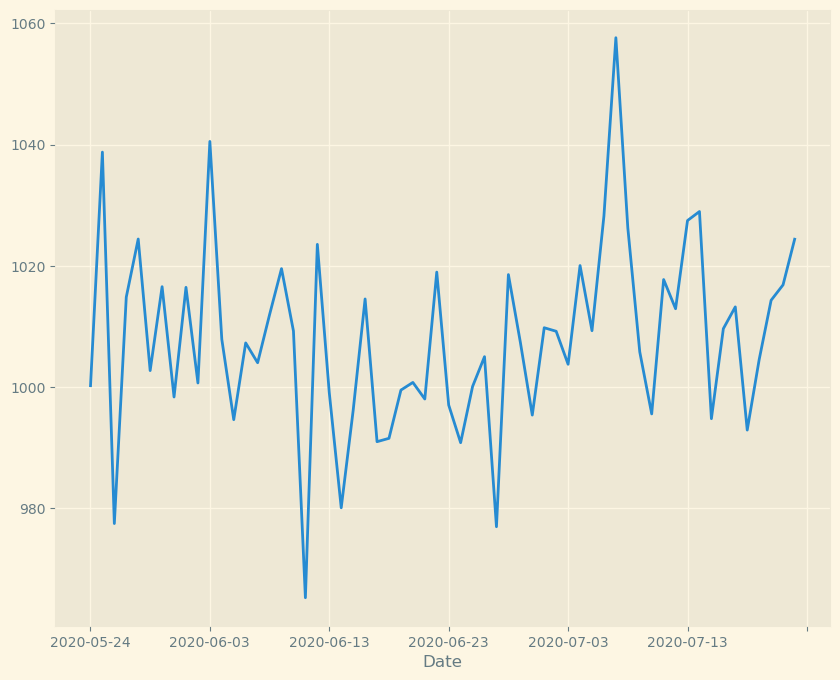

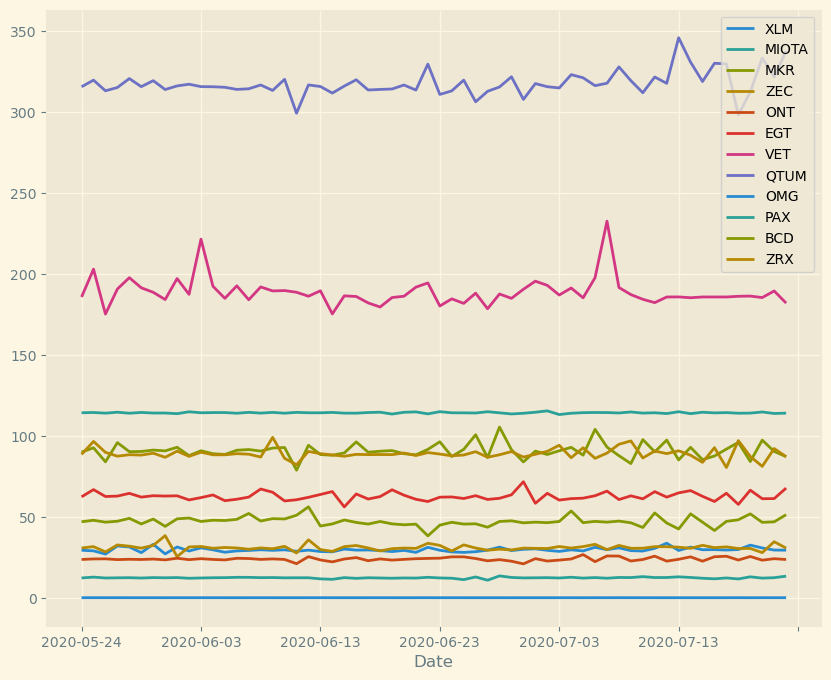

These are the predicted portfolio returns The first set is the annual returns before standardising

 XLM      0.006747
MIOTA    0.433277
MKR      0.450381
ZEC     -0.011156
ONT     -0.002972
EGT      0.416278
VET     -0.082853
QTUM     0.328768
OMG      0.155997
PAX     -0.008915
BCD     -0.123219
ZRX     -0.068072
Total    0.107523
dtype: float64 

 The latter is the standardised annual returns

 XLM      0.009419
MIOTA    0.012348
MKR      0.020600
ZEC      0.020107
ONT      0.010325
EGT      0.014799
VET      0.005787
QTUM     0.006950
OMG      0.013966
PAX     -0.000079
BCD      0.012373
ZRX      0.006703
Total    0.002756
dtype: float64
Only has one value


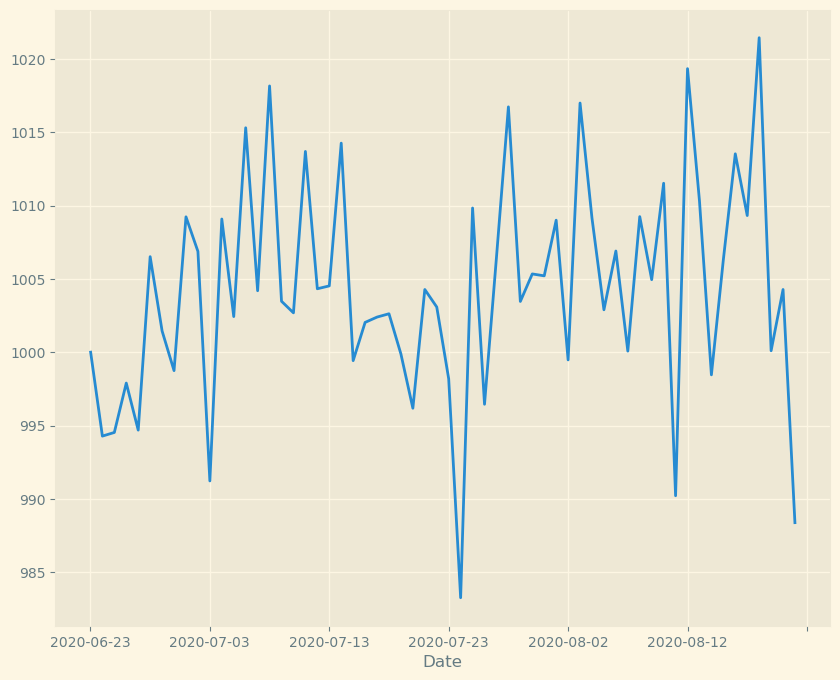

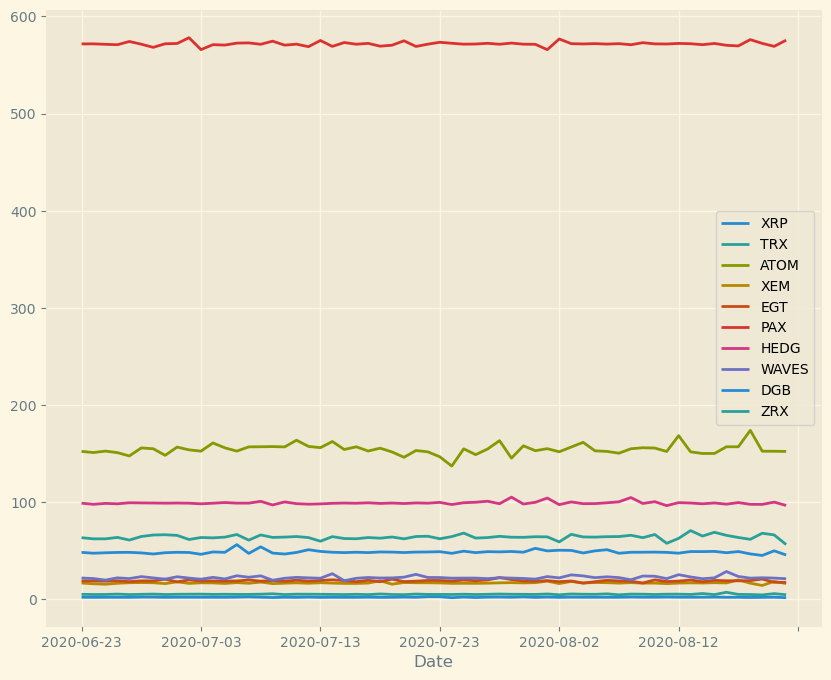

These are the predicted portfolio returns The first set is the annual returns before standardising

 XRP     -0.215103
TRX     -0.389185
ATOM     0.000000
XEM     -0.111063
EGT     -0.293050
PAX      0.028313
HEDG    -0.095012
WAVES   -0.130234
DGB     -0.621305
ZRX     -0.293725
Total   -0.048681
dtype: float64 

 The latter is the standardised annual returns

 XRP      0.001250
TRX     -0.002020
ATOM     0.004792
XEM      0.010484
EGT      0.004547
PAX      0.000557
HEDG    -0.000487
WAVES    0.019272
DGB      0.016031
ZRX      0.021382
Total   -0.000597
dtype: float64
Only has one value


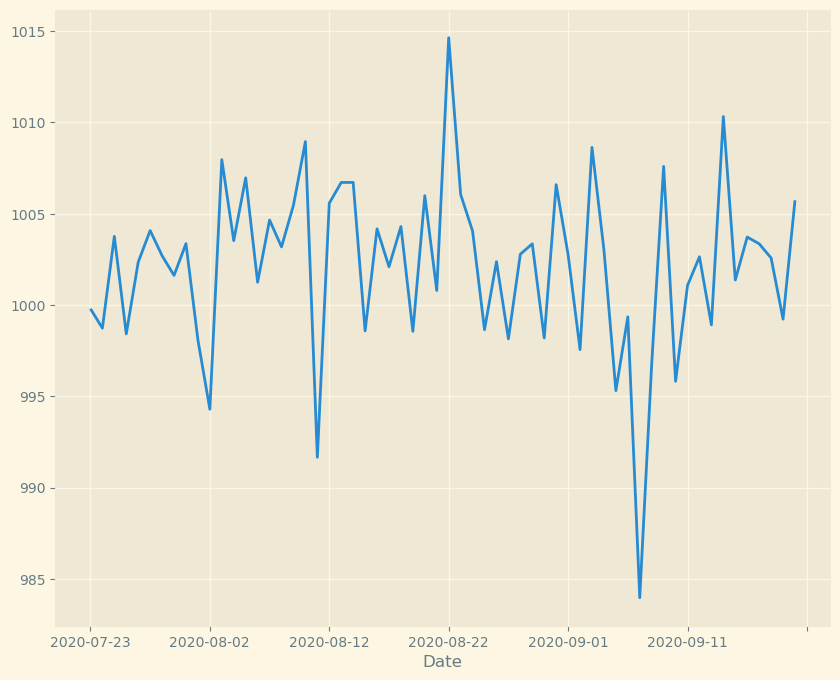

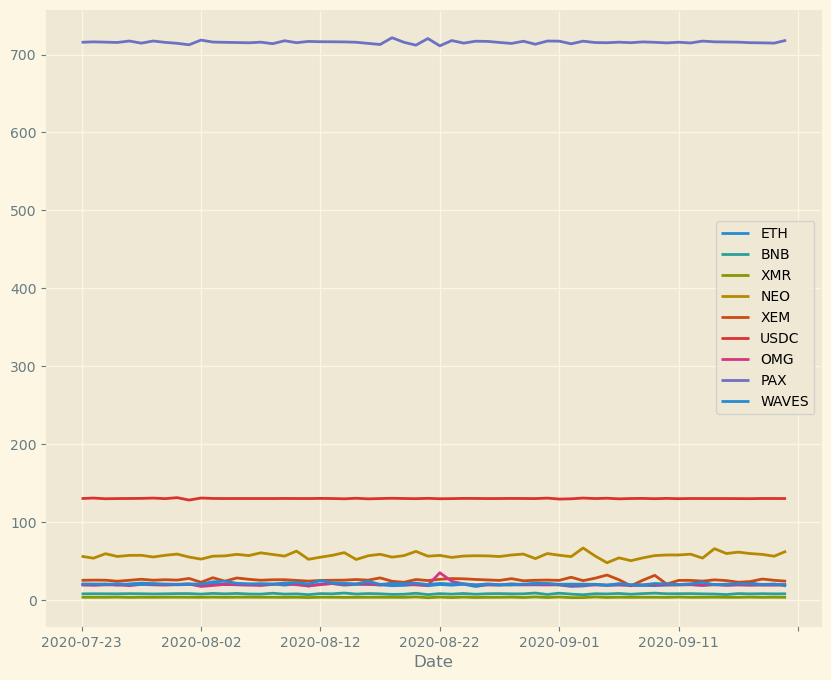

These are the predicted portfolio returns The first set is the annual returns before standardising

 ETH     -0.254804
BNB      0.033401
XMR     -0.091303
NEO      0.585858
XEM     -0.177498
USDC    -0.000405
OMG      0.047079
PAX      0.014918
WAVES   -0.154618
Total    0.025181
dtype: float64 

 The latter is the standardised annual returns

 ETH      0.004939
BNB      0.021833
XMR      0.021644
NEO      0.021210
XEM      0.029668
USDC     0.000051
OMG      0.027081
PAX      0.000289
WAVES    0.006473
Total    0.000521
dtype: float64
Only has one value


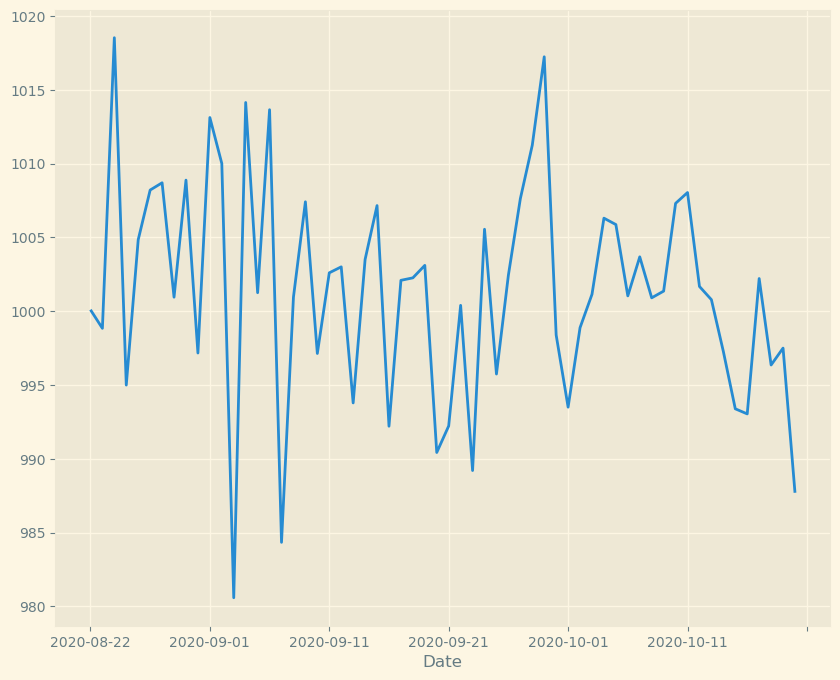

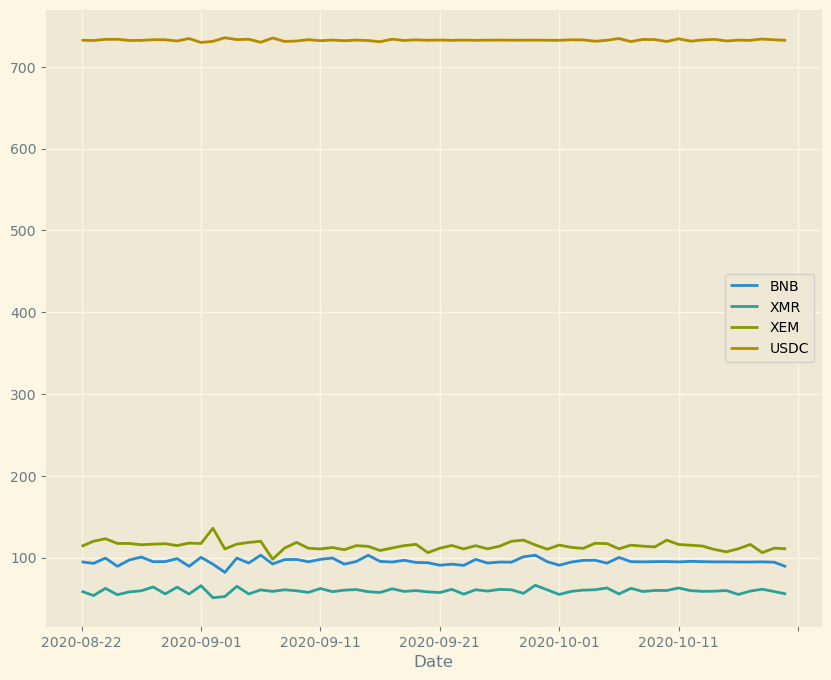

These are the predicted portfolio returns The first set is the annual returns before standardising

 BNB     -0.234891
XMR     -0.218872
XEM     -0.106394
USDC    -0.000984
Total   -0.051043
dtype: float64 

 The latter is the standardised annual returns

 BNB      0.002639
XMR      0.012103
XEM      0.005210
USDC    -0.000003
Total   -0.000627
dtype: float64
Only has one value


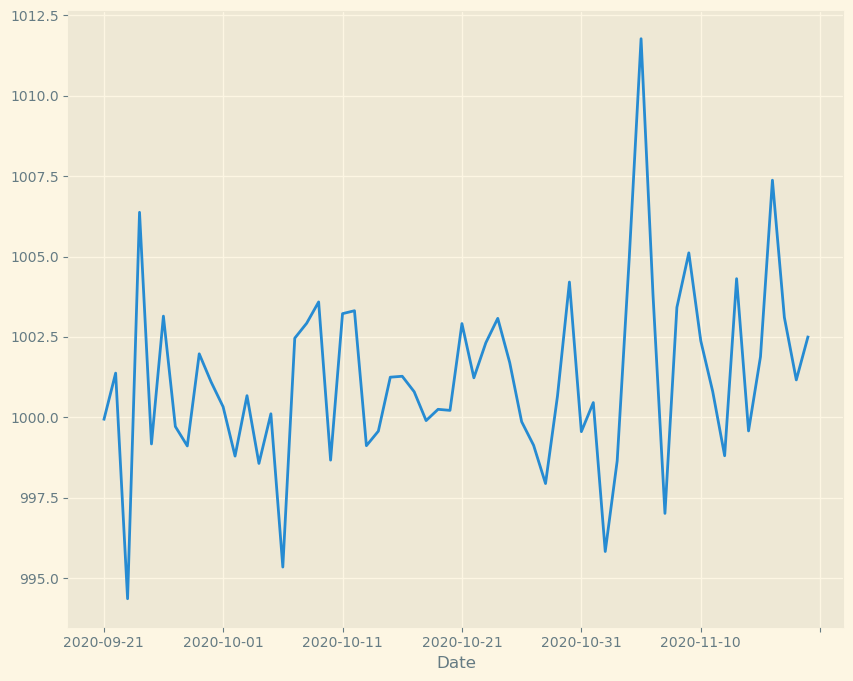

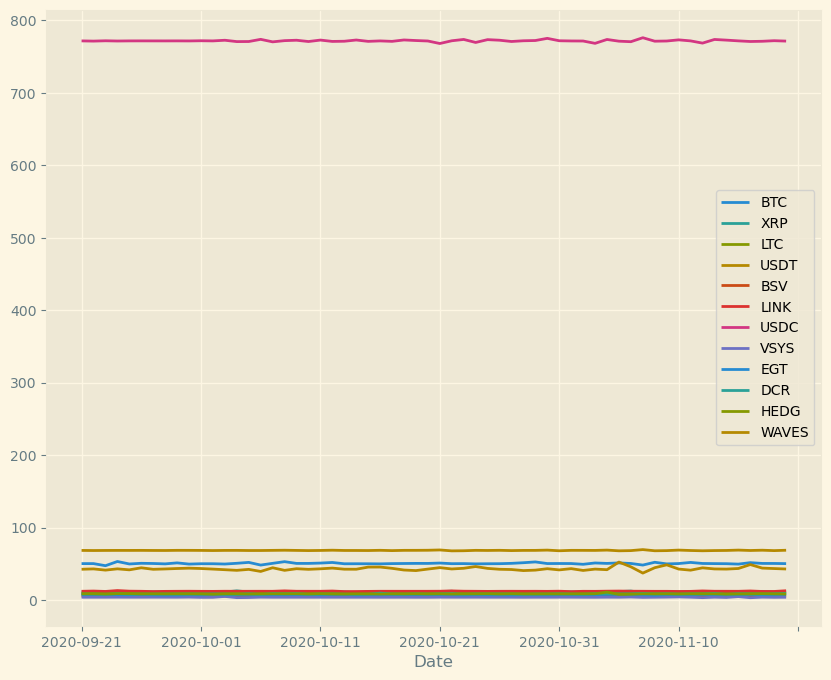

These are the predicted portfolio returns The first set is the annual returns before standardising

 BTC     -0.001463
XRP      0.106421
LTC      0.212703
USDT     0.014801
BSV      0.105135
LINK     0.278216
USDC    -0.001514
VSYS    -0.009224
EGT      0.139229
DCR      0.502238
HEDG    -0.149700
WAVES    0.037179
Total    0.011121
dtype: float64 

 The latter is the standardised annual returns

 BTC      0.002031
XRP      0.011362
LTC      0.015454
USDT     0.000344
BSV      0.007055
LINK     0.005893
USDC    -0.000009
VSYS     0.022220
EGT      0.004981
DCR      0.018786
HEDG     0.004414
WAVES    0.010748
Total    0.000219
dtype: float64
Only has one value


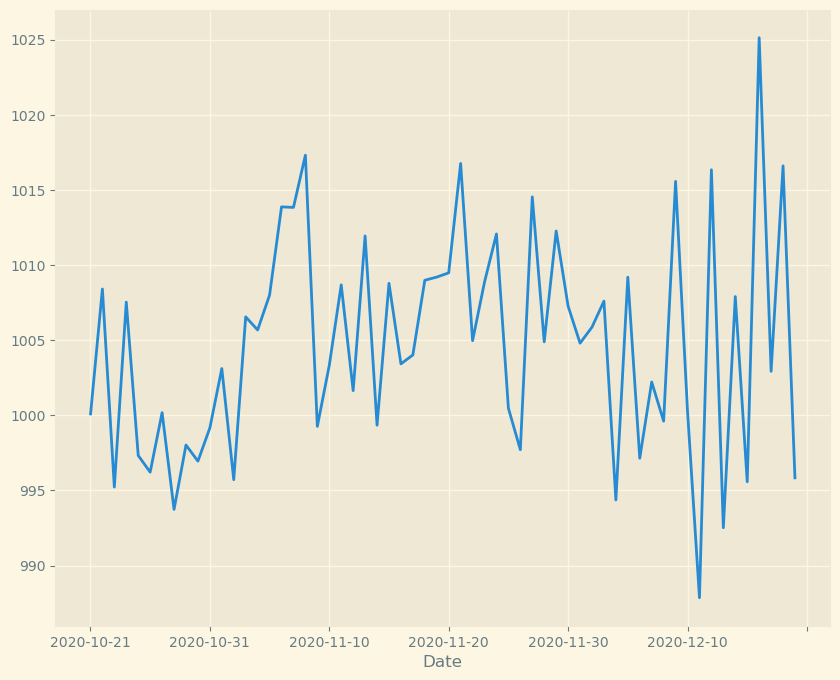

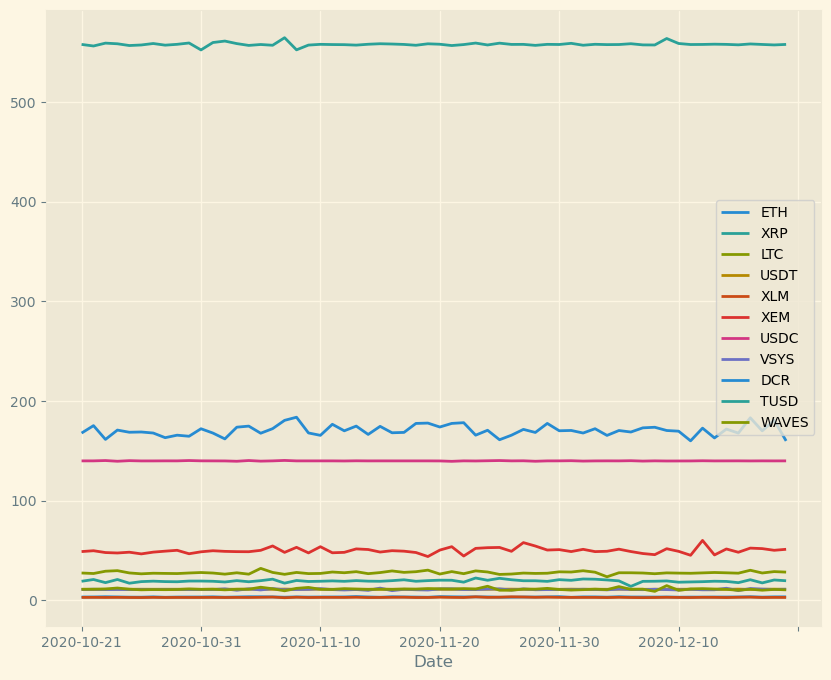

These are the predicted portfolio returns The first set is the annual returns before standardising

 ETH      0.224862
XRP      0.119588
LTC      0.142276
USDT    -0.013883
XLM     -0.037035
XEM      0.210647
USDC     0.000198
VSYS     0.120859
DCR     -0.182318
TUSD     0.000016
WAVES   -0.174876
Total   -0.017763
dtype: float64 

 The latter is the standardised annual returns

 ETH      0.014140
XRP      0.023490
LTC      0.011509
USDT    -0.000105
XLM      0.011105
XEM      0.019741
USDC     0.000011
VSYS     0.016259
DCR      0.000835
TUSD     0.000053
WAVES    0.034261
Total   -0.000041
dtype: float64
Only has one value


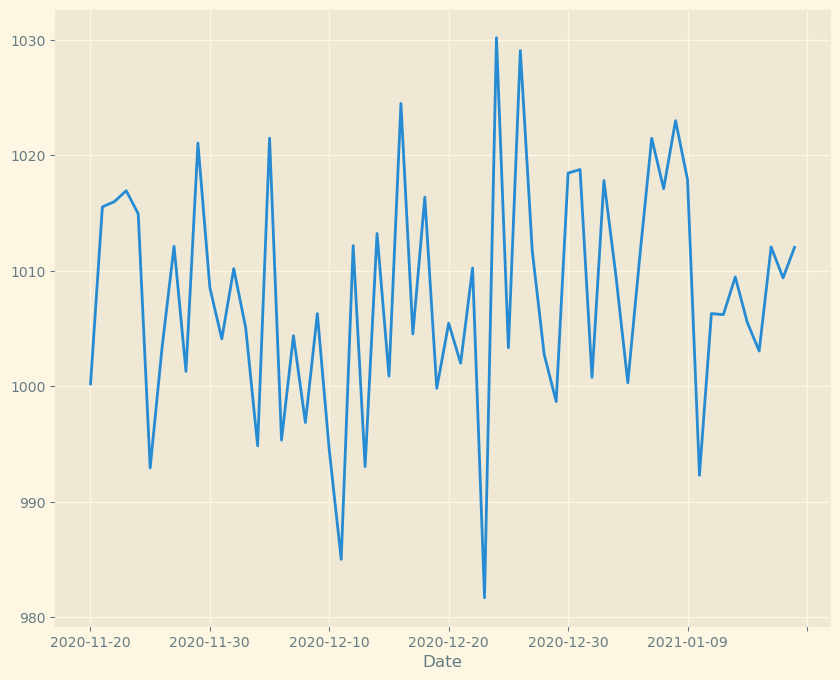

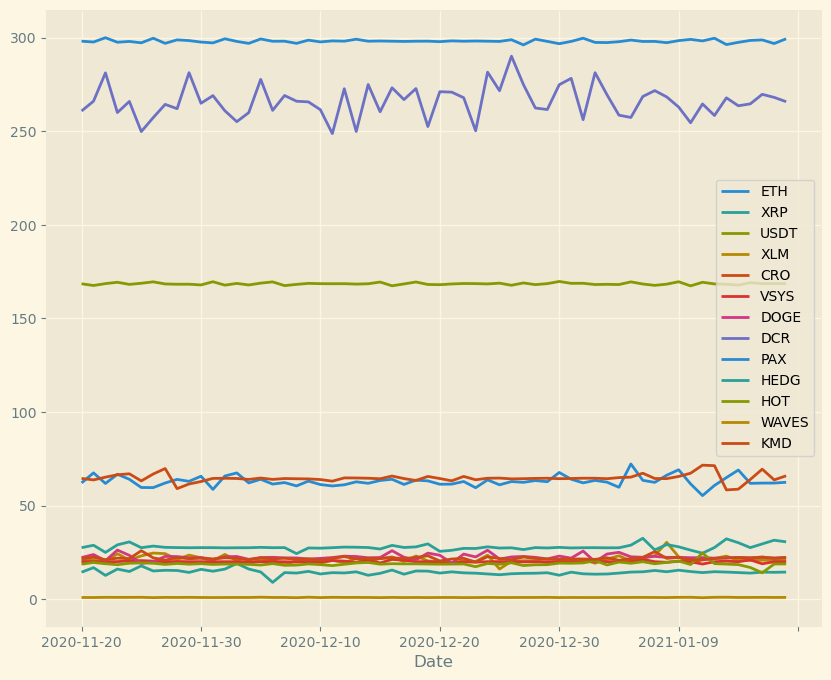

These are the predicted portfolio returns The first set is the annual returns before standardising

 ETH      0.023024
XRP      0.016165
USDT     0.002253
XLM      0.008846
CRO      0.094244
VSYS    -0.007014
DOGE     0.006611
DCR      0.083023
PAX      0.018276
HEDG     0.568316
HOT      0.027842
WAVES    0.161569
KMD      0.116123
Total    0.051608
dtype: float64 

 The latter is the standardised annual returns

 ETH      0.008006
XRP      0.033660
USDT     0.000105
XLM      0.028636
CRO      0.005589
VSYS     0.001988
DOGE     0.020395
DCR      0.006362
PAX      0.000353
HEDG     0.017361
HOT      0.013992
WAVES    0.023981
KMD      0.009106
Total    0.001351
dtype: float64
Only has one value


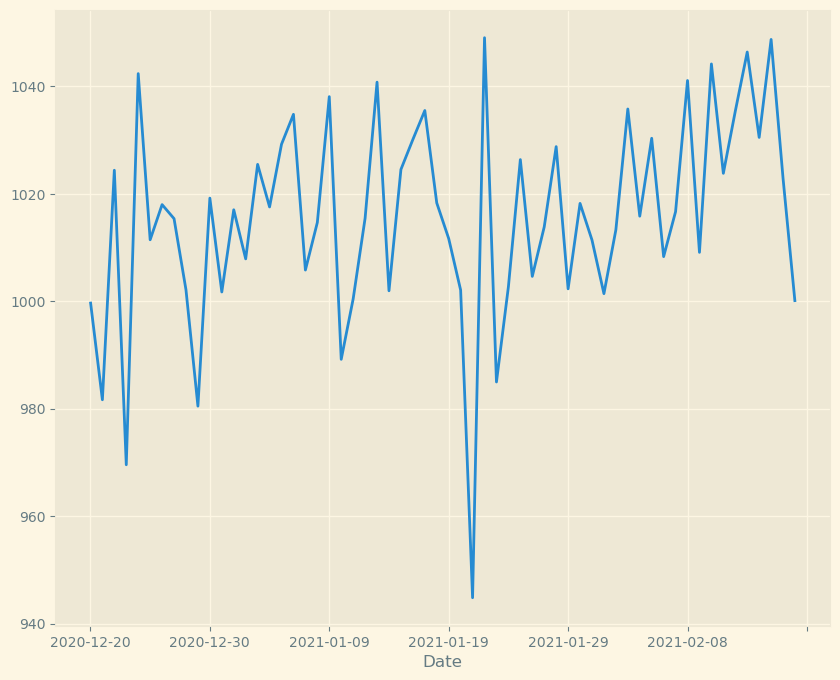

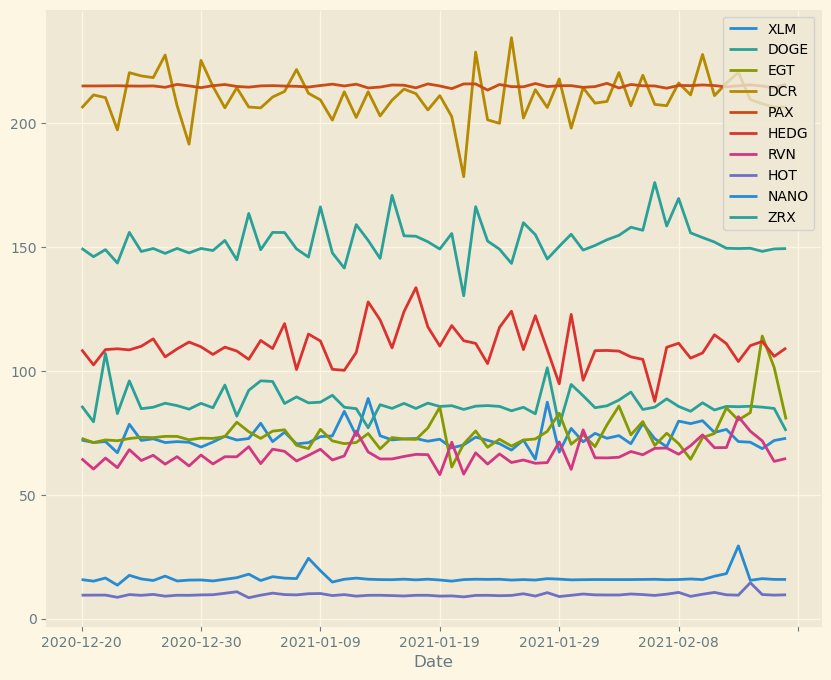

These are the predicted portfolio returns The first set is the annual returns before standardising

 XLM      0.042135
DOGE    -0.408355
EGT      0.517740
DCR      0.006382
PAX      0.012627
HEDG     0.025758
RVN      0.003521
HOT      0.065354
NANO     0.013721
ZRX     -0.003935
Total   -0.000214
dtype: float64 

 The latter is the standardised annual returns

 XLM      0.016441
DOGE     0.007996
EGT      0.026642
DCR      0.010453
PAX      0.000249
HEDG     0.019258
RVN      0.016027
HOT      0.023494
NANO     0.041406
ZRX      0.010573
Total    0.001773
dtype: float64
Only has one value


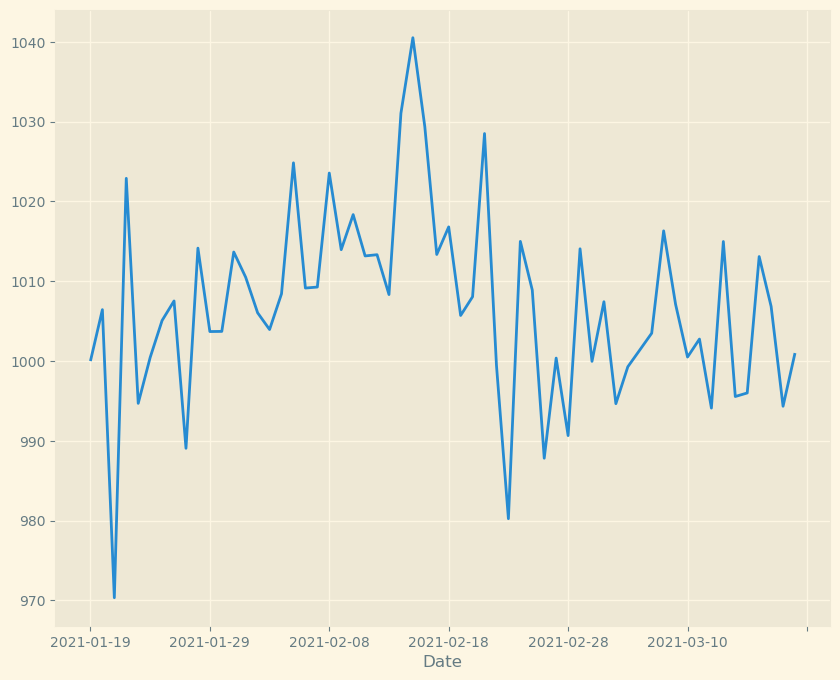

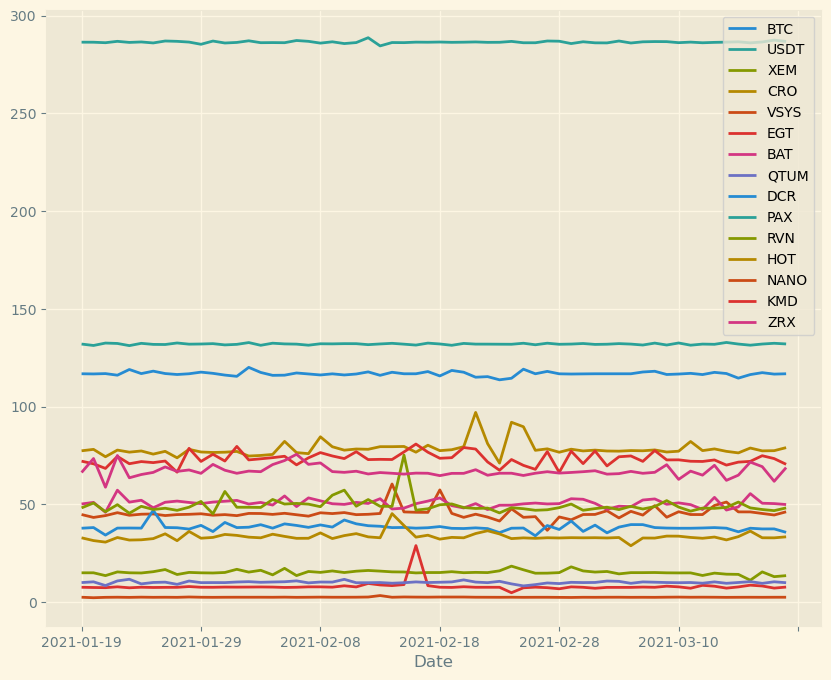

These are the predicted portfolio returns The first set is the annual returns before standardising

 BTC      0.000000
USDT     0.005453
XEM     -0.348158
CRO      0.090739
VSYS     0.137600
EGT      0.057430
BAT     -0.023677
QTUM    -0.028809
DCR     -0.214278
PAX      0.001632
RVN     -0.001111
HOT      0.064538
NANO     0.000773
KMD     -0.090574
ZRX      0.168844
Total    0.004204
dtype: float64 

 The latter is the standardised annual returns

 BTC      0.000341
USDT     0.000113
XEM      0.013037
CRO      0.010044
VSYS     0.018078
EGT      0.143052
BAT      0.007709
QTUM     0.014029
DCR      0.005565
PAX      0.000078
RVN      0.022584
HOT      0.012495
NANO     0.007121
KMD      0.006786
ZRX      0.011862
Total    0.000585
dtype: float64
Only has one value


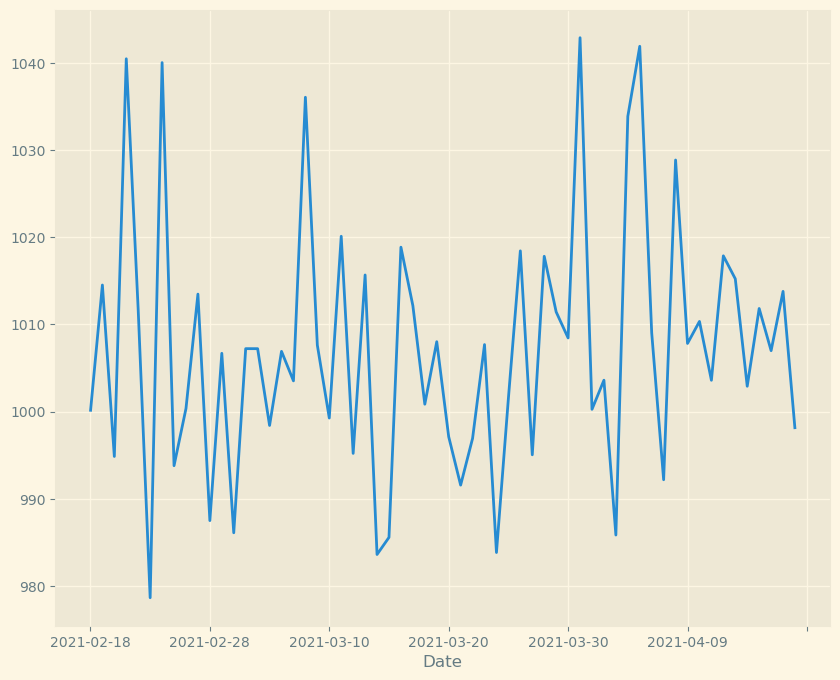

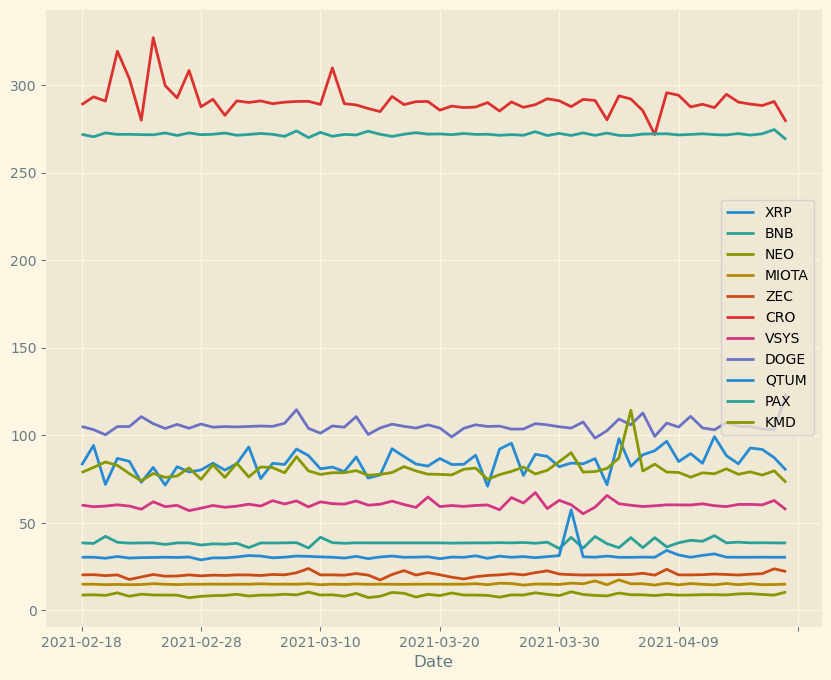

These are the predicted portfolio returns The first set is the annual returns before standardising

 XRP     -0.138841
BNB     -0.002812
NEO      1.169325
MIOTA    0.007909
ZEC      0.463993
CRO     -0.134545
VSYS    -0.172699
DOGE     0.963875
QTUM     0.001527
PAX     -0.045416
KMD     -0.270261
Total   -0.008374
dtype: float64 

 The latter is the standardised annual returns

 XRP      0.027370
BNB      0.010160
NEO      0.043312
MIOTA    0.004443
ZEC      0.016092
CRO      0.000795
VSYS     0.001828
DOGE     0.016254
QTUM     0.030145
PAX     -0.000724
KMD      0.007457
Total    0.000935
dtype: float64
Only has one value


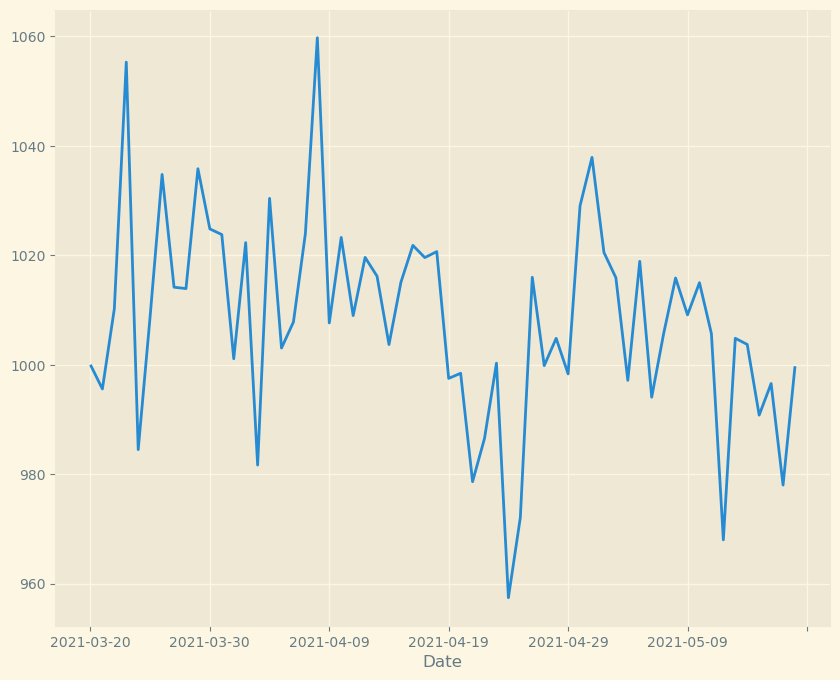

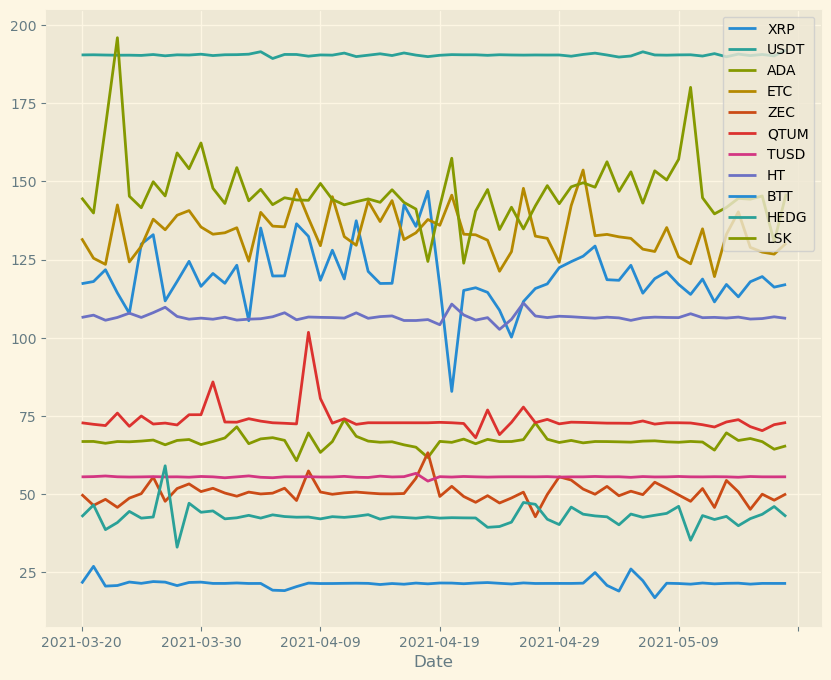

These are the predicted portfolio returns The first set is the annual returns before standardising

 XRP     -0.009078
USDT     0.035593
ADA     -0.083410
ETC     -0.048818
ZEC      0.013679
QTUM     0.004954
TUSD     0.000875
HT      -0.011262
BTT      0.000000
HEDG     0.008546
LSK      0.037290
Total   -0.001122
dtype: float64 

 The latter is the standardised annual returns

 XRP      0.023340
USDT     0.000616
ADA      0.002221
ETC      0.009734
ZEC      0.014234
QTUM     0.010537
TUSD     0.000139
HT       0.000360
BTT      0.017407
HEDG     0.029327
LSK      0.016220
Total    0.001130
dtype: float64
Only has one value


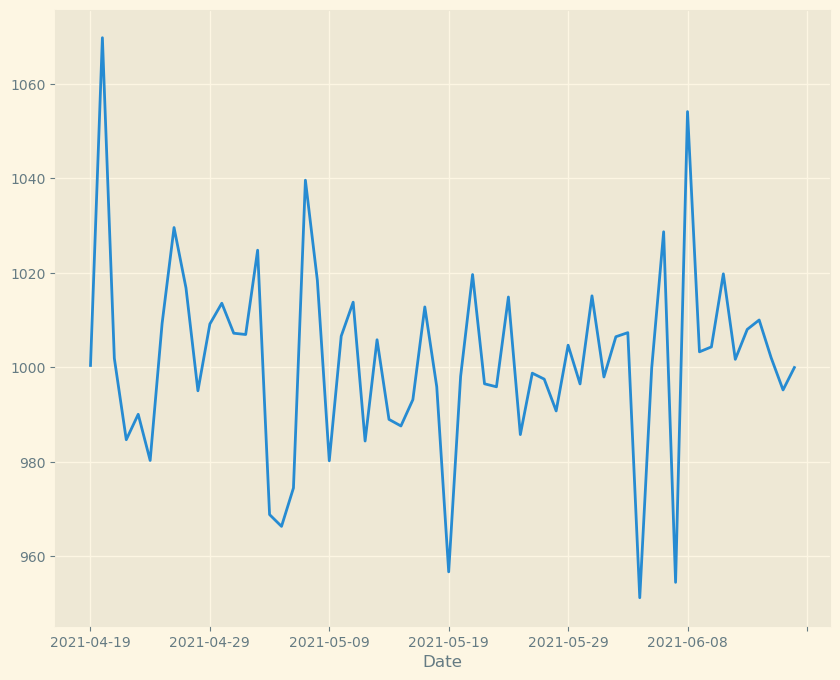

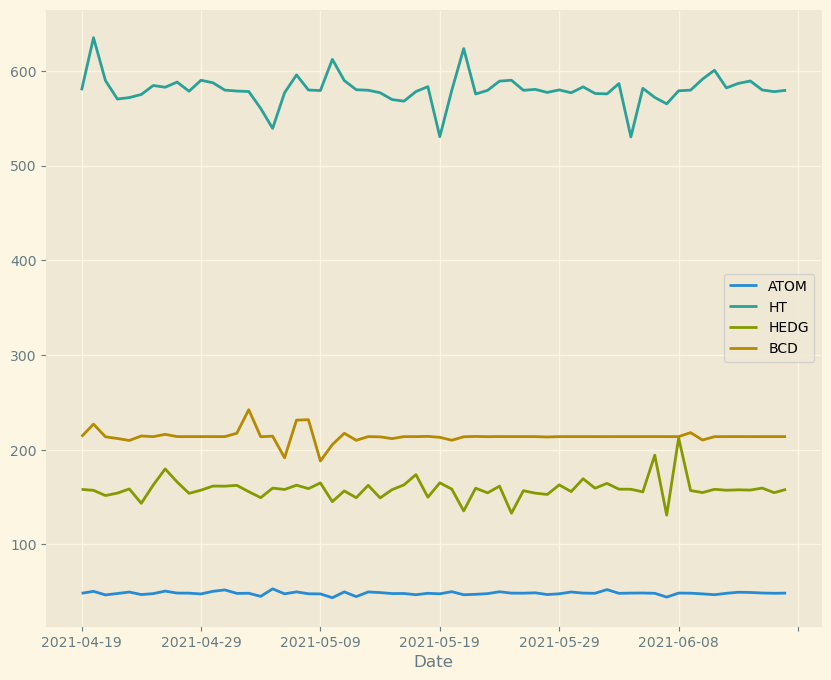

These are the predicted portfolio returns The first set is the annual returns before standardising

 ATOM     0.012676
HT       0.000000
HEDG    -0.000695
BCD      0.000000
Total    0.000502
dtype: float64 

 The latter is the standardised annual returns

 ATOM     0.006183
HT       0.002923
HEDG     0.029976
BCD      0.005058
Total    0.002013
dtype: float64
Only has one value


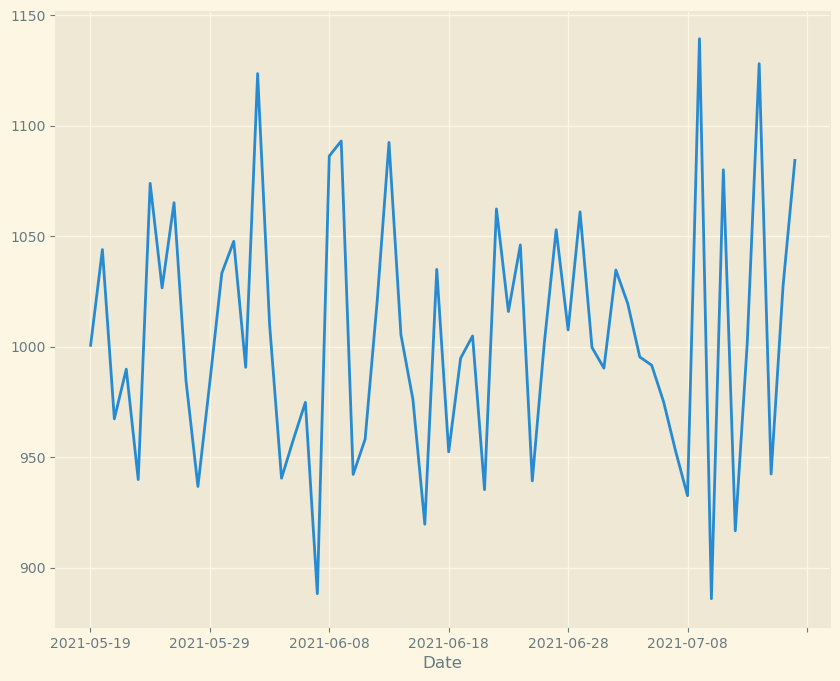

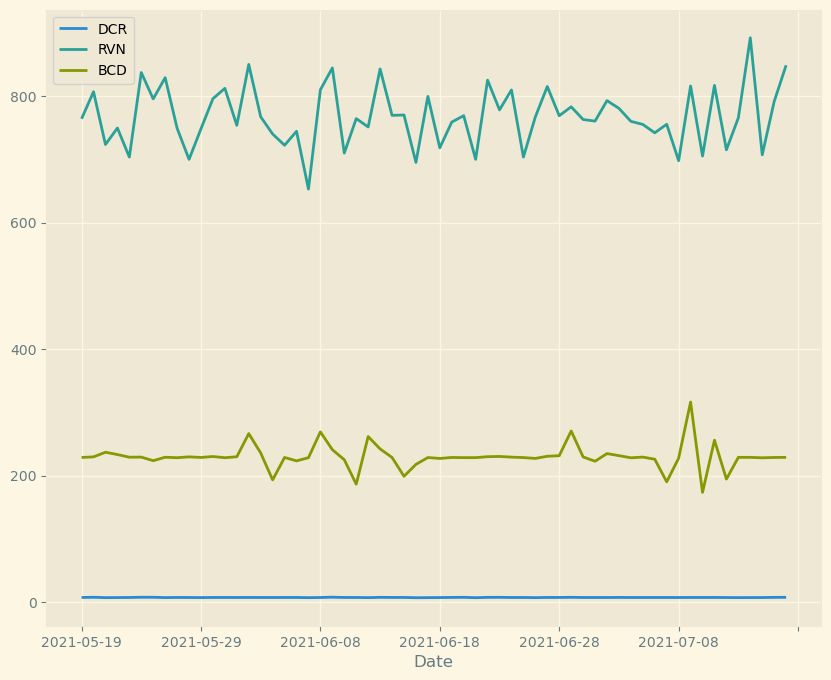

These are the predicted portfolio returns The first set is the annual returns before standardising

 DCR      0.165131
RVN      0.554005
BCD      0.002681
Total    0.408571
dtype: float64 

 The latter is the standardised annual returns

 DCR      0.004798
RVN      0.027406
BCD      0.042130
Total    0.023343
dtype: float64


In [333]:
total_portfolio = [] #Making fake list to start
total_portfolio_accumulate = [] #Making fake list to start
for index, sharpe in zip(index__, sharpe_allocation):
    mod_df=pd.DataFrame()
    for i in range(len(top_50)):
        try:
            temp_df=pd.read_csv(f'predicted_prices/{top_50[i]}_{index}.csv').set_index('Date')
            temp_df.rename(columns={"Predicted_Close": f"{top_50[i]}"},inplace=True)
            mod_df=pd.concat([mod_df, temp_df], axis=1)
        except:
            print("Only has one value")
            
    sharpe = sharpe[sharpe != 0].dropna(axis="columns")
    
    portfolio_df = []
    
    mod_df.drop(columns=[col for col in mod_df if col not in sharpe.columns], inplace=True)
    
    for col in sharpe.columns:
        temp_df = mod_df[[col]]
        temp_df["Norm_return"] = np.zeros(len(temp_df))
        temp_val = 1.00
        for row, row2 in  zip(temp_df.index, temp_df[1:].index ):
            temp_df.loc[row, "Norm_return"] = temp_val
            temp_val = temp_df.loc[row2,col] / temp_df.loc[row,col]
        temp_df.loc[row2, "Norm_return"] = temp_val
        temp_df['Allocation'] = temp_df['Norm_return']*(sharpe[col].values[0]/100)
        temp_df['Position Value'] = temp_df['Allocation']*1000
        portfolio_df.append(temp_df["Position Value"])
        
    portfolio_val = pd.concat(portfolio_df, axis=1)
    portfolio_val.columns = sharpe.columns

    portfolio_val['Total'] = portfolio_val.sum(axis=1)
    
    
    # plot our portfolio
    import matplotlib.pyplot as plt
    %matplotlib inline
    portfolio_val['Total'].plot(figsize=(10,8))
    plt.pause(0.000005)
    portfolio_val.drop('Total',axis=1).plot(figsize=(10,8))
    plt.pause(0.000005)
    cols = sharpe.columns.values
    cols = np.append(cols, ["Total"])
    non_s_returns = (portfolio_val[-1:].values / portfolio_val[:1].values) -1
    returns = portfolio_val.pct_change()
    mean_returns = returns.mean()
    annual_mean_returns = (1 + mean_returns)**(ave_trading_days/60) - 1
    annual_returns = (1 + pd.Series(non_s_returns[0], index=cols))**(ave_trading_days/60) - 1
    print("These are the predicted portfolio returns",
          "The first set is the annual returns before standardising\n\n",
          annual_returns,"\n\n The latter is the standardised annual returns\n\n",annual_mean_returns)
    if total_portfolio.__class__ is list:
        total_portfolio = portfolio_val["Total"]
    else:
        total_portfolio = pd.concat([total_portfolio, portfolio_val["Total"]])
    total_portfolio_accumulate.append(annual_mean_returns["Total"])


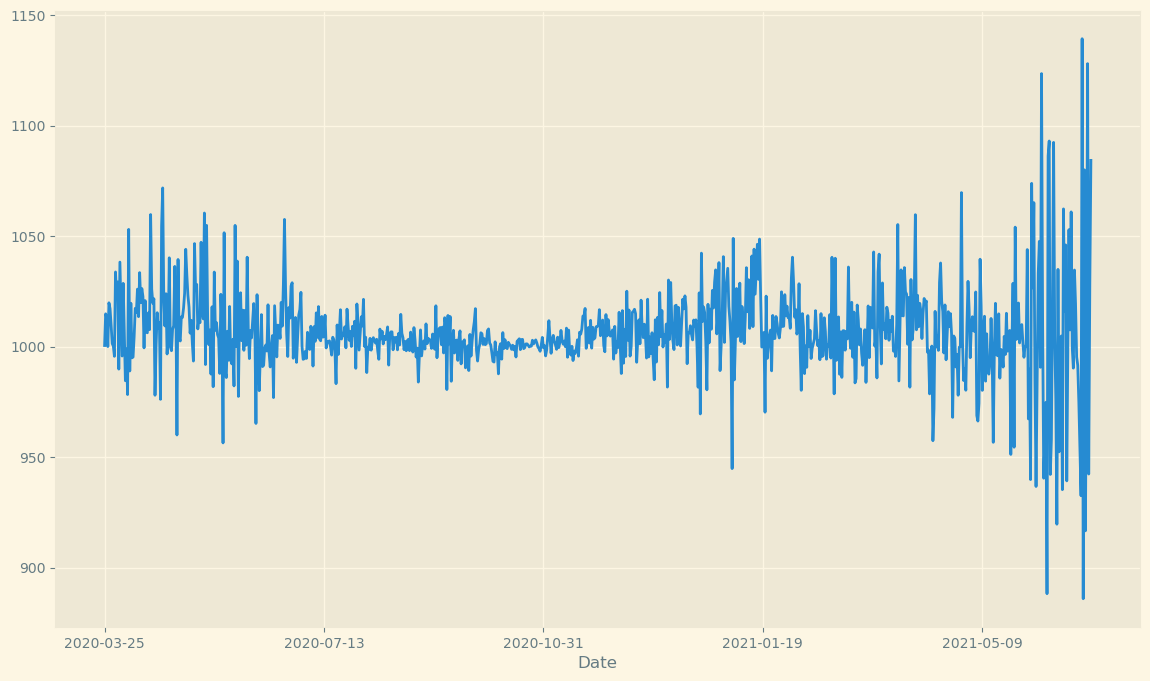

In [314]:
total_portfolio.plot(figsize=(14,8))
plt.pause(0.000005)

In [345]:
flat_index = [item for sublist in index__ for item in sublist]

In [346]:
portfolio = 1000
total_to_plot = []
for i in total_portfolio_accumulate:
    portfolio = portfolio * (1 + i)
    total_to_plot.append(portfolio)



In [349]:
total_to_plot = pd.DataFrame(total_to_plot, index=flat_index, columns=["Returns"])

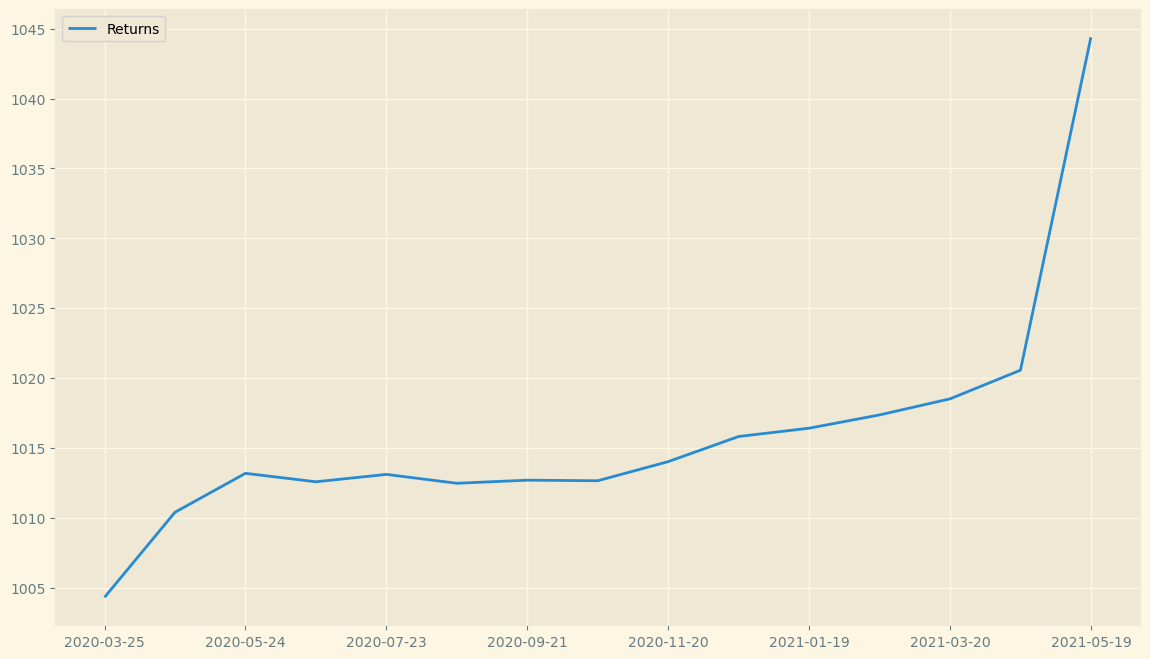

In [350]:
total_to_plot.plot(figsize=(14,8))
plt.pause(0.000005)